I find this great notebook on the [github](https://github.com/AI4Finance-Foundation/FinRL-Tutorials/blob/master/1-Introduction/FinRL_PortfolioAllocation_NeurIPS_2020.ipynb). Thanks to all the contributors of FinRL!

There are more [materials](https://github.com/AI4Finance-Foundation/FinRL-Tutorials)

# Deep Reinforcement Learning for Stock Trading from Scratch: Portfolio Allocation

Tutorials to use OpenAI DRL to perform portfolio allocation in one Jupyter Notebook | Presented at NeurIPS 2020: Deep RL Workshop

* This blog is based on our paper: FinRL: A Deep Reinforcement Learning Library for Automated Stock Trading in Quantitative Finance, presented at NeurIPS 2020: Deep RL Workshop.
* Check out medium blog for detailed explanations: https://towardsdatascience.com/finrl-for-quantitative-finance-tutorial-for-portfolio-allocation-9b417660c7cd
* Please report any issues to our Github: https://github.com/AI4Finance-Foundation/FinRL/issues
* **Pytorch Version**



# Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Python packages](#1)
    * [2.1. Install Packages](#1.1)    
    * [2.2. Check Additional Packages](#1.2)
    * [2.3. Import Packages](#1.3)
    * [2.4. Create Folders](#1.4)
* [3. Download Data](#2)
* [4. Preprocess Data](#3)        
    * [4.1. Technical Indicators](#3.1)
    * [4.2. Perform Feature Engineering](#3.2)
* [5.Build Environment](#4)  
    * [5.1. Training & Trade Data Split](#4.1)
    * [5.2. User-defined Environment](#4.2)   
    * [5.3. Initialize Environment](#4.3)    
* [6.Implement DRL Algorithms](#5)  
* [7.Backtesting Performance](#6)  
    * [7.1. BackTestStats](#6.1)
    * [7.2. BackTestPlot](#6.2)   
    * [7.3. Baseline Stats](#6.3)   
    * [7.3. Compare to Stock Market Index](#6.4)             

<a id='0'></a>
# Part 1. Problem Definition

This problem is to design an automated trading solution for portfolio alloacation. We model the stock trading process as a Markov Decision Process (MDP). We then formulate our trading goal as a maximization problem.

The algorithm is trained using Deep Reinforcement Learning (DRL) algorithms and the components of the reinforcement learning environment are:


* Action: The action space describes the allowed actions that the agent interacts with the
environment. Normally, a ∈ A represents the weight of a stock in the porfolio: a ∈ (-1,1). Assume our stock pool includes N stocks, we can use a list [a<sub>1</sub>, a<sub>2</sub>, ... , a<sub>N</sub>] to determine the weight for each stock in the porfotlio, where a<sub>i</sub> ∈ (-1,1), a<sub>1</sub>+ a<sub>2</sub>+...+a<sub>N</sub>=1. For example, "The weight of AAPL in the portfolio is 10%." is [0.1 , ...].

* Reward function: r(s, a, s′) is the incentive mechanism for an agent to learn a better action. The change of the portfolio value when action a is taken at state s and arriving at new state s',  i.e., r(s, a, s′) = v′ − v, where v′ and v represent the portfolio
values at state s′ and s, respectively

* State: The state space describes the observations that the agent receives from the environment. Just as a human trader needs to analyze various information before executing a trade, so
our trading agent observes many different features to better learn in an interactive environment.

* Environment: Dow 30 consituents


The data of the single stock that we will be using for this case study is obtained from Yahoo Finance API. The data contains Open-High-Low-Close price and volume.


<a id='1'></a>
# Part 2. Getting Started- Load Python Packages

<a id='1.1'></a>
## 2.1. Install all the packages through FinRL library


In [ ]:
# Restart runtime
# From the Runtime menu, select Restart runtime

# Uninstall current NumPy version
!pip uninstall -y numpy

# Install compatible NumPy version
!pip install numpy==1.23.0

# Upgrade or downgrade TensorBoard (if necessary)
!pip install --upgrade tensorboard

# Install necessary build tools and dependencies
!apt-get update
!apt-get install -y swig

!pip uninstall -y tensorboard numpy
!pip install numpy==1.22.4
!pip install tensorboard==2.8.0

# Install specific version of box2d-py
!pip install box2d-py==2.3.5

# Install other dependencies
!pip install gymnasium==0.29.1
!pip install stable-baselines3==2.4.0a1
!pip install ccxt==3.1.60
!pip install jqdatasdk==1.9.4
!pip install alpaca-trade-api==3.2.0
!pip install exchange-calendars==4.5.4
!pip install pyfolio==0.9.2
!pip install pyportfolioopt==1.5.5
!pip install ray[default,tune]==2.22.0
!pip install stockstats==0.5.4
!pip install wrds==3.2.0
!pip uninstall -y pandas

# Install pandas version 1.5.3
!pip install pandas==1.5.3

Found existing installation: numpy 1.25.2
Uninstalling numpy-1.25.2:
  Successfully uninstalled numpy-1.25.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 18.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.23.0 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.23.0 which is incompatible.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.23.0 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 42.1 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.23.0 which is incompatible.
tensorflow 2.15.0 requires tensorboard<2.16,>=2.15, but you have tensorboard 2.17.0 which is incompatible.
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 51.9 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully uninstalled google-auth-oauthlib-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.19.2 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
tensorflow 2.15.0 requires numpy<2.0.

In [ ]:
## install finrl library
%pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-35vv2gkj
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-35vv2gkj
  Resolved https://github.com/AI4Finance-LLC/FinRL-Library.git to commit 625d5d24d517d711337c323ca751a5b241718bde
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-k3ddd6ee/elegantrl_3288952b876a45fdbd3b15fc4a129921
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-k3ddd6ee/elegantrl_3288952b876a45fdbd3b15fc4a129921
  Resolved https://github.com/AI4Finance-Foundation/ElegantRL.git to commit 5ef11a573caeb79d1498119777dfd36bf155e14b
  Preparing metadata (setup.py) ... done
  Using cached tensorboard-2.17.0-py3-none-any.wh


<a id='1.2'></a>
## 2.2. Check if the additional packages needed are present, if not install them.
* Yahoo Finance API
* pandas
* numpy
* matplotlib
* stockstats
* OpenAI gym
* stable-baselines
* tensorflow
* pyfolio

<a id='1.3'></a>
## 2.3. Import Packages

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pip install wrds

In [ ]:
!pip uninstall -y pandas

# Install pandas version 1.5.3

!pip install pandas==1.5.3

Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.
pandas-gbq 0.19.2 requires google-auth-oauthlib>=0.7.0, but you have google-auth-oauthlib 0.4.6 which is incompatible.
wrds 3.2.0 requires pandas<2.3,>=2.2, but you have pandas 1.5.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.config_tickers import DOW_30_TICKER
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

/usr/local/lib/python3.10/dist-packages/pandas_datareader/compat/__init__.py:11: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  PANDAS_VERSION = LooseVersion(pd.__version__)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline
import datetime

from finrl import config
from finrl import config_tickers
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_portfolio_allocation.env_portfolio import StockPortfolioEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline,convert_daily_return_to_pyfolio_ts
from finrl.meta.data_processor import DataProcessor
from finrl.meta.data_processors.processor_yahoofinance import YahooFinanceProcessor
import sys
sys.path.append("../FinRL-Library")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<a id='1.4'></a>
## 2.4. Create Folders

In [ ]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

<a id='2'></a>
# Part 3. Download Data
Yahoo Finance is a website that provides stock data, financial news, financial reports, etc. All the data provided by Yahoo Finance is free.
* FinRL uses a class **YahooDownloader** to fetch data from Yahoo Finance API
* Call Limit: Using the Public API (without authentication), you are limited to 2,000 requests per hour per IP (or up to a total of 48,000 requests a day).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

# Read the DataFrame from the CSV file in Google Drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_data_jp.csv')
df['date'] = pd.to_datetime(df['date'])

# Verify the DataFrame
print(df.head())


Mounted at /content/drive
        date     open    high     low        close     volume     tic  day
0 2008-01-04  3390.00  3405.0  3175.0  1696.816528  451820000  2914.T    4
1 2008-01-04  1324.00  1346.0  1292.0   964.984497    9393500  4063.T    4
2 2008-01-04  6270.00  6350.0  6240.0  3217.266846    3385200  4502.T    4
3 2008-01-04   733.75   740.0   720.0   549.358582    4789600  4543.T    4
4 2008-01-04  2620.00  2645.0  2570.0  2037.189209    1148000  4911.T    4


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,open,high,low,close,volume,tic,day
0,2008-01-04,3390.00,3405.0,3175.0,1696.816528,451820000,2914.T,4
1,2008-01-04,1324.00,1346.0,1292.0,964.984497,9393500,4063.T,4
2,2008-01-04,6270.00,6350.0,6240.0,3217.266846,3385200,4502.T,4
3,2008-01-04,733.75,740.0,720.0,549.358582,4789600,4543.T,4
4,2008-01-04,2620.00,2645.0,2570.0,2037.189209,1148000,4911.T,4


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(98658, 8)

# Part 4: Preprocess Data
Data preprocessing is a crucial step for training a high quality machine learning model. We need to check for missing data and do feature engineering in order to convert the data into a model-ready state.
* Add technical indicators. In practical trading, various information needs to be taken into account, for example the historical stock prices, current holding shares, technical indicators, etc. In this article, we demonstrate two trend-following technical indicators: MACD and RSI.
* Add turbulence index. Risk-aversion reflects whether an investor will choose to preserve the capital. It also influences one's trading strategy when facing different market volatility level. To control the risk in a worst-case scenario, such as financial crisis of 2007–2008, FinRL employs the financial turbulence index that measures extreme asset price fluctuation.

In [ ]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    use_turbulence=False,
                    user_defined_feature = False)

df = fe.preprocess_data(df)

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


Successfully added technical indicators


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(98658, 16)

In [ ]:
df.head()

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2008-01-04,3390.00,3405.0,3175.0,1696.816528,451820000,2914.T,4,0.0,1740.309748,1605.748846,0.0,-66.666667,100.0,1696.816528,1696.816528
3402,2008-01-04,1324.00,1346.0,1292.0,964.984497,9393500,4063.T,4,0.0,1740.309748,1605.748846,0.0,-66.666667,100.0,964.984497,964.984497
6804,2008-01-04,6270.00,6350.0,6240.0,3217.266846,3385200,4502.T,4,0.0,1740.309748,1605.748846,0.0,-66.666667,100.0,3217.266846,3217.266846
10206,2008-01-04,733.75,740.0,720.0,549.358582,4789600,4543.T,4,0.0,1740.309748,1605.748846,0.0,-66.666667,100.0,549.358582,549.358582
13608,2008-01-04,2620.00,2645.0,2570.0,2037.189209,1148000,4911.T,4,0.0,1740.309748,1605.748846,0.0,-66.666667,100.0,2037.189209,2037.189209


## Add covariance matrix as states

In [ ]:
# add covariance matrix as states
df=df.sort_values(['date','tic'],ignore_index=True)
df.index = df.date.factorize()[0]

cov_list = []
return_list = []

# look back is one year
lookback=252
for i in range(lookback,len(df.index.unique())):
  data_lookback = df.loc[i-lookback:i,:]
  price_lookback=data_lookback.pivot_table(index = 'date',columns = 'tic', values = 'close')
  return_lookback = price_lookback.pct_change().dropna()
  return_list.append(return_lookback)

  covs = return_lookback.cov().values
  cov_list.append(covs)


df_cov = pd.DataFrame({'date':df.date.unique()[lookback:],'cov_list':cov_list,'return_list':return_list})
df = df.merge(df_cov, on='date')
df = df.sort_values(['date','tic']).reset_index(drop=True)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(91350, 18)

In [ ]:
df.head()

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,cov_list,return_list
0,2009-01-15,1450.0,1450.0,1390.00,742.939697,746780000,2914.T,3,-22.275674,833.114385,749.400526,40.731801,-102.669280,32.237892,824.859027,846.394481,"[[0.0011429674278560253, 0.0005771303072367979...",tic 2914.T 4063.T 4502.T 45...
1,2009-01-15,848.0,848.0,810.00,603.515320,21301000,4063.T,3,8.401165,672.551226,537.310749,47.614706,52.943248,10.078092,586.577165,618.665308,"[[0.0011429674278560253, 0.0005771303072367979...",tic 2914.T 4063.T 4502.T 45...
2,2009-01-15,4410.0,4410.0,4280.00,2247.196045,5344400,4502.T,3,-28.328313,2442.984382,2266.676458,43.517151,-225.070855,25.660746,2363.581177,2417.485856,"[[0.0011429674278560253, 0.0005771303072367979...",tic 2914.T 4063.T 4502.T 45...
3,2009-01-15,450.0,450.0,438.75,332.189911,18136800,4543.T,3,-14.478323,420.119181,337.481811,39.436157,-245.295069,39.024487,385.251858,387.475916,"[[0.0011429674278560253, 0.0005771303072367979...",tic 2914.T 4063.T 4502.T 45...
4,2009-01-15,1771.0,1771.0,1724.00,1353.361450,4465000,4911.T,3,-13.565233,1526.158075,1345.731293,42.535793,-43.695031,30.125229,1400.043461,1475.443880,"[[0.0011429674278560253, 0.0005771303072367979...",tic 2914.T 4063.T 4502.T 45...


<a id='4'></a>
# Part 5. Design Environment
Considering the stochastic and interactive nature of the automated stock trading tasks, a financial task is modeled as a **Markov Decision Process (MDP)** problem. The training process involves observing stock price change, taking an action and reward's calculation to have the agent adjusting its strategy accordingly. By interacting with the environment, the trading agent will derive a trading strategy with the maximized rewards as time proceeds.

Our trading environments, based on OpenAI Gym framework, simulate live stock markets with real market data according to the principle of time-driven simulation.


## Training data split: 2009-01-01 to 2020-07-01

In [ ]:
train = data_split(df, '2009-01-01','2020-07-01')
#trade = data_split(df, '2020-01-01', config.END_DATE)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
train.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,cov_list,return_list
0,2009-01-15,1450.0,1450.0,1390.00,742.939697,746780000,2914.T,3,-22.275674,833.114385,749.400526,40.731801,-102.669280,32.237892,824.859027,846.394481,"[[0.0011429674278560253, 0.0005771303072367979...",tic 2914.T 4063.T 4502.T 45...
0,2009-01-15,848.0,848.0,810.00,603.515320,21301000,4063.T,3,8.401165,672.551226,537.310749,47.614706,52.943248,10.078092,586.577165,618.665308,"[[0.0011429674278560253, 0.0005771303072367979...",tic 2914.T 4063.T 4502.T 45...
0,2009-01-15,4410.0,4410.0,4280.00,2247.196045,5344400,4502.T,3,-28.328313,2442.984382,2266.676458,43.517151,-225.070855,25.660746,2363.581177,2417.485856,"[[0.0011429674278560253, 0.0005771303072367979...",tic 2914.T 4063.T 4502.T 45...
0,2009-01-15,450.0,450.0,438.75,332.189911,18136800,4543.T,3,-14.478323,420.119181,337.481811,39.436157,-245.295069,39.024487,385.251858,387.475916,"[[0.0011429674278560253, 0.0005771303072367979...",tic 2914.T 4063.T 4502.T 45...
0,2009-01-15,1771.0,1771.0,1724.00,1353.361450,4465000,4911.T,3,-13.565233,1526.158075,1345.731293,42.535793,-43.695031,30.125229,1400.043461,1475.443880,"[[0.0011429674278560253, 0.0005771303072367979...",tic 2914.T 4063.T 4502.T 45...


## Environment for Portfolio Allocation


In [ ]:
import numpy as np
import pandas as pd
from gym.utils import seeding
import gym
from gym import spaces
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv


class StockPortfolioEnv(gym.Env):
    """A single stock trading environment for OpenAI gym

    Attributes
    ----------
        df: DataFrame
            input data
        stock_dim : int
            number of unique stocks
        hmax : int
            maximum number of shares to trade
        initial_amount : int
            start money
        transaction_cost_pct: float
            transaction cost percentage per trade
        reward_scaling: float
            scaling factor for reward, good for training
        state_space: int
            the dimension of input features
        action_space: int
            equals stock dimension
        tech_indicator_list: list
            a list of technical indicator names
        turbulence_threshold: int
            a threshold to control risk aversion
        day: int
            an increment number to control date

    Methods
    -------
    _sell_stock()
        perform sell action based on the sign of the action
    _buy_stock()
        perform buy action based on the sign of the action
    step()
        at each step the agent will return actions, then
        we will calculate the reward, and return the next observation.
    reset()
        reset the environment
    render()
        use render to return other functions
    save_asset_memory()
        return account value at each time step
    save_action_memory()
        return actions/positions at each time step


    """
    metadata = {'render.modes': ['human']}

    def __init__(self,
                df,
                stock_dim,
                hmax,
                initial_amount,
                transaction_cost_pct,
                reward_scaling,
                state_space,
                action_space,
                tech_indicator_list,
                turbulence_threshold=None,
                lookback=252,
                day = 0):
        #super(StockEnv, self).__init__()
        #money = 10 , scope = 1
        self.day = day
        self.lookback=lookback
        self.df = df
        self.stock_dim = stock_dim
        self.hmax = hmax
        self.initial_amount = initial_amount
        self.transaction_cost_pct =transaction_cost_pct
        self.reward_scaling = reward_scaling
        self.state_space = state_space
        self.action_space = action_space
        self.tech_indicator_list = tech_indicator_list

        # action_space normalization and shape is self.stock_dim
        self.action_space = spaces.Box(low = 0, high = 1,shape = (self.action_space,))
        # Shape = (34, 30)
        # covariance matrix + technical indicators
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape = (self.state_space+len(self.tech_indicator_list),self.state_space))

        # load data from a pandas dataframe
        self.data = self.df.loc[self.day,:]
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.terminal = False
        self.turbulence_threshold = turbulence_threshold
        # initalize state: inital portfolio return + individual stock return + individual weights
        self.portfolio_value = self.initial_amount

        # memorize portfolio value each step
        self.asset_memory = [self.initial_amount]
        # memorize portfolio return each step
        self.portfolio_return_memory = [0]
        self.actions_memory=[[1/self.stock_dim]*self.stock_dim]
        self.date_memory=[self.data.date.unique()[0]]


    def step(self, actions):
        # print(self.day)
        self.terminal = self.day >= len(self.df.index.unique())-1
        # print(actions)

        if self.terminal:
            df = pd.DataFrame(self.portfolio_return_memory)
            df.columns = ['daily_return']
            plt.plot(df.daily_return.cumsum(),'r')
            plt.savefig('results/cumulative_reward.png')
            plt.close()

            plt.plot(self.portfolio_return_memory,'r')
            plt.savefig('results/rewards.png')
            plt.close()

            print("=================================")
            print("begin_total_asset:{}".format(self.asset_memory[0]))
            print("end_total_asset:{}".format(self.portfolio_value))

            df_daily_return = pd.DataFrame(self.portfolio_return_memory)
            df_daily_return.columns = ['daily_return']
            if df_daily_return['daily_return'].std() !=0:
              sharpe = (252**0.5)*df_daily_return['daily_return'].mean()/ \
                       df_daily_return['daily_return'].std()
              print("Sharpe: ",sharpe)
            print("=================================")

            return self.state, self.reward, self.terminal,{}

        else:
            #print("Model actions: ",actions)
            # actions are the portfolio weight
            # normalize to sum of 1
            #if (np.array(actions) - np.array(actions).min()).sum() != 0:
            #  norm_actions = (np.array(actions) - np.array(actions).min()) / (np.array(actions) - np.array(actions).min()).sum()
            #else:
            #  norm_actions = actions
            weights = self.softmax_normalization(actions)
            #print("Normalized actions: ", weights)
            self.actions_memory.append(weights)
            last_day_memory = self.data

            #load next state
            self.day += 1
            self.data = self.df.loc[self.day,:]
            self.covs = self.data['cov_list'].values[0]
            self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
            #print(self.state)
            # calcualte portfolio return
            # individual stocks' return * weight
            portfolio_return = sum(((self.data.close.values / last_day_memory.close.values)-1)*weights)
            # update portfolio value
            new_portfolio_value = self.portfolio_value*(1+portfolio_return)
            self.portfolio_value = new_portfolio_value

            # save into memory
            self.portfolio_return_memory.append(portfolio_return)
            self.date_memory.append(self.data.date.unique()[0])
            self.asset_memory.append(new_portfolio_value)

            # the reward is the new portfolio value or end portfolo value
            self.reward = new_portfolio_value
            #print("Step reward: ", self.reward)
            #self.reward = self.reward*self.reward_scaling

        return self.state, self.reward, self.terminal, {}

    def reset(self):
        self.asset_memory = [self.initial_amount]
        self.day = 0
        self.data = self.df.loc[self.day,:]
        # load states
        self.covs = self.data['cov_list'].values[0]
        self.state =  np.append(np.array(self.covs), [self.data[tech].values.tolist() for tech in self.tech_indicator_list ], axis=0)
        self.portfolio_value = self.initial_amount
        #self.cost = 0
        #self.trades = 0
        self.terminal = False
        self.portfolio_return_memory = [0]
        self.actions_memory=[[1/self.stock_dim]*self.stock_dim]
        self.date_memory=[self.data.date.unique()[0]]
        return self.state

    def render(self, mode='human'):
        return self.state

    def softmax_normalization(self, actions):
        numerator = np.exp(actions)
        denominator = np.sum(np.exp(actions))
        softmax_output = numerator/denominator
        return softmax_output


    def save_asset_memory(self):
        date_list = self.date_memory
        portfolio_return = self.portfolio_return_memory
        #print(len(date_list))
        #print(len(asset_list))
        df_account_value = pd.DataFrame({'date':date_list,'daily_return':portfolio_return})
        return df_account_value

    def save_action_memory(self):
        # date and close price length must match actions length
        date_list = self.date_memory
        df_date = pd.DataFrame(date_list)
        df_date.columns = ['date']

        action_list = self.actions_memory
        df_actions = pd.DataFrame(action_list)
        df_actions.columns = self.data.tic.values
        df_actions.index = df_date.date
        #df_actions = pd.DataFrame({'date':date_list,'actions':action_list})
        return df_actions

    def _seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]

    def get_sb_env(self):
        e = DummyVecEnv([lambda: self])
        obs = e.reset()
        return e, obs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stock_dimension = len(train.tic.unique())
state_space = stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")


Stock Dimension: 29, State Space: 29


In [ ]:
env_kwargs = {
    "hmax": 100,
    "initial_amount": 1000000,
    "transaction_cost_pct": 0.001,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": config.INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4

}

e_train_gym = StockPortfolioEnv(df = train, **env_kwargs)

In [ ]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


<a id='5'></a>
# Part 6: Implement DRL Algorithms
* The implementation of the DRL algorithms are based on **OpenAI Baselines** and **Stable Baselines**. Stable Baselines is a fork of OpenAI Baselines, with a major structural refactoring, and code cleanups.
* FinRL library includes fine-tuned standard DRL algorithms, such as DQN, DDPG,
Multi-Agent DDPG, PPO, SAC, A2C and TD3. We also allow users to
design their own DRL algorithms by adapting these DRL algorithms.

In [ ]:
# initialize
agent = DRLAgent(env = env_train)

### Model 1: **A2C**


In [ ]:
agent = DRLAgent(env = env_train)

A2C_PARAMS = {"n_steps": 5, "ent_coef": 0.005, "learning_rate": 0.0002}
model_a2c = agent.get_model(model_name="a2c",model_kwargs = A2C_PARAMS)

{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0002}
Using cpu device


In [ ]:
trained_a2c = agent.train_model(model=model_a2c,
                                tb_log_name='a2c',
                                total_timesteps=50000)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-------------------------------------
| time/                 |           |
|    fps                | 219       |
|    iterations         | 100       |
|    time_elapsed       | 2         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -41.1     |
|    explained_variance | 0         |
|    learning_rate      | 0.0002    |
|    n_updates          | 99        |
|    policy_loss        | 1.92e+08  |
|    reward             | 1516722.6 |
|    std                | 0.998     |
|    value_loss         | 2.43e+13  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 226       |
|    iterations         | 200       |
|    time_elapsed       | 4         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -41.1     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0002    |
|    n_updat

In [ ]:
trained_a2c.save('/content/trained_models/trained_a2c.zip')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Trading
Assume that we have $1,000,000 initial capital at 2019-01-01. We use the A2C model to trade Dow jones 30 stocks.

In [ ]:
trade = data_split(df,'2020-07-01', '2021-10-31')
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)


In [ ]:
trade.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(9454, 18)

In [ ]:
df_daily_return, df_actions = DRLAgent.DRL_prediction(model=trained_a2c,
                        environment = e_trade_gym)

begin_total_asset:1000000
end_total_asset:1433701.0859627828
Sharpe:  1.770902451321981
hit end!


In [ ]:
df_daily_return.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,date,daily_return
0,2020-07-01,0.000000
1,2020-07-02,0.006077
2,2020-07-03,0.005573
3,2020-07-06,0.015808
4,2020-07-07,-0.004567


In [ ]:
df_daily_return.to_csv('df_daily_return.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_actions.head()

,2914.T,4063.T,4502.T,4543.T,4911.T,5108.T,6367.T,6501.T,6594.T,6645.T,...,7751.T,7974.T,8001.T,8035.T,8267.T,8411.T,8801.T,9432.T,9983.T,9984.T
date,,,,,,,,,,,,,,,,,,,,,
2020-07-01,0.034483,0.034483,0.034483,0.034483,0.034483,0.034483,0.034483,0.034483,0.034483,0.034483,...,0.034483,0.034483,0.034483,0.034483,0.034483,0.034483,0.034483,0.034483,0.034483,0.034483
2020-07-02,0.070600,0.048527,0.025972,0.025972,0.025972,0.053871,0.025972,0.025972,0.025972,0.056135,...,0.025972,0.025972,0.025972,0.030504,0.025972,0.031241,0.025972,0.025972,0.025972,0.032651
2020-07-03,0.070600,0.048527,0.025972,0.025972,0.025972,0.053871,0.025972,0.025972,0.025972,0.056135,...,0.025972,0.025972,0.025972,0.030504,0.025972,0.031241,0.025972,0.025972,0.025972,0.032651
2020-07-06,0.070600,0.048527,0.025972,0.025972,0.025972,0.053871,0.025972,0.025972,0.025972,0.056135,...,0.025972,0.025972,0.025972,0.030504,0.025972,0.031241,0.025972,0.025972,0.025972,0.032651
2020-07-07,0.070600,0.048527,0.025972,0.025972,0.025972,0.053871,0.025972,0.025972,0.025972,0.056135,...,0.025972,0.025972,0.025972,0.030504,0.025972,0.031241,0.025972,0.025972,0.025972,0.032651


In [ ]:
df_actions.to_csv('df_actions.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class


In [ ]:
from pyfolio import timeseries
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return)
perf_func = timeseries.perf_stats
perf_stats_all = perf_func( returns=DRL_strat,
                              factor_returns=DRL_strat,
                                positions=None, transactions=None, turnover_denom="AGB")

In [ ]:
print("==============DRL Strategy Stats===========")
perf_stats_all

==============DRL Strategy Stats===========


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Annual return          0.321124
Cumulative returns     0.433701
Annual volatility      0.164999
Sharpe ratio           1.770902
Calmar ratio           3.908727
Stability              0.881160
Max drawdown          -0.082156
Omega ratio            1.335952
Sortino ratio          2.744482
Skew                  -0.039536
Kurtosis               0.412121
Tail ratio             1.187562
Daily value at risk   -0.019628
Alpha                  0.000000
Beta                   1.000000
dtype: float64

In [ ]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI",
        start = df_daily_return.loc[0,'date'],
        end = df_daily_return.loc[len(df_daily_return)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========


/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
[*********************100%%**********************]  1 of 1 completed

Shape of DataFrame:  (336, 8)
Annual return          0.279047
Cumulative returns     0.388402
Annual volatility      0.139129
Sharpe ratio           1.844560
Calmar ratio           3.124551
Stability              0.918675
Max drawdown          -0.089308
Omega ratio            1.358960
Sortino ratio          2.734872
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.052781
Daily value at risk   -0.016510
dtype: float64


<a id='6.2'></a>
## 7.2 BackTestPlot

In [ ]:
df_daily_return['date'] = pd.to_datetime(df_daily_return['date'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pip install --upgrade numpy

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyfolio

In [ ]:
%matplotlib inline

baseline_df = get_baseline(
        ticker='^DJI', start=df_daily_return.loc[0,'date'], end='2021-11-01'
    )
baseline_returns = get_daily_return(baseline_df, value_col_name="close")


/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
[*********************100%%**********************]  1 of 1 completed

Shape of DataFrame:  (337, 8)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Start date: 2020-07-01 00:00:00+00:00
End date: 2021-10-29 00:00:00+00:00
Total months: 16

Backtest Performance
Annual return          0.290226
Cumulative returns     0.406027
Annual volatility      0.165321
Sharpe ratio           1.624482
Calmar ratio           3.001020
Stability              0.841877
Max drawdown          -0.096709
Omega ratio            1.305414
Sortino ratio          2.509734
Skew                  -0.014169
Kurtosis               0.392457
Tail ratio             1.185114
Daily value at risk   -0.019763
dtype: float64

Benchmark Performance
Annual return          0.280495
Cumulative returns     0.391863
Annual volatility      0.138927
Sharpe ratio           1.855203
Calmar ratio           3.140767
Stability              0.918753
Max drawdown          -0.089308
Omega ratio            1.361583
Sortino ratio          2.750755
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.053708
Daily value at risk   -0.016480
dtype: float64

W

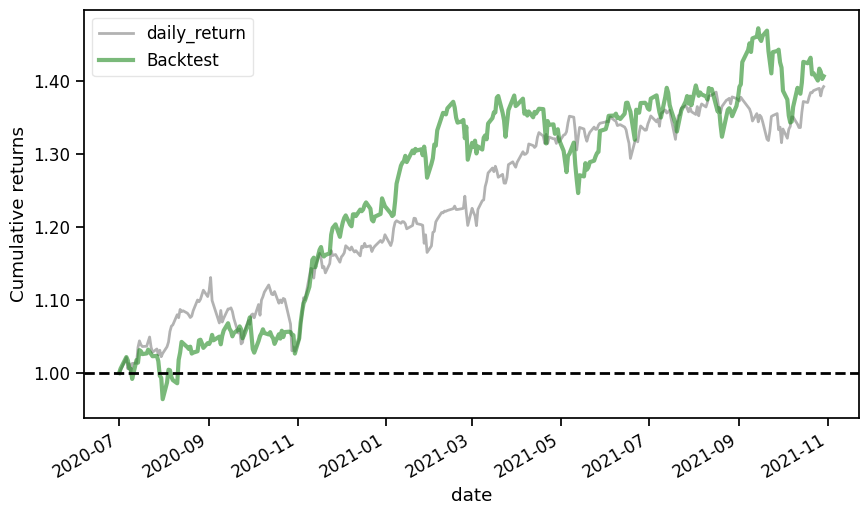

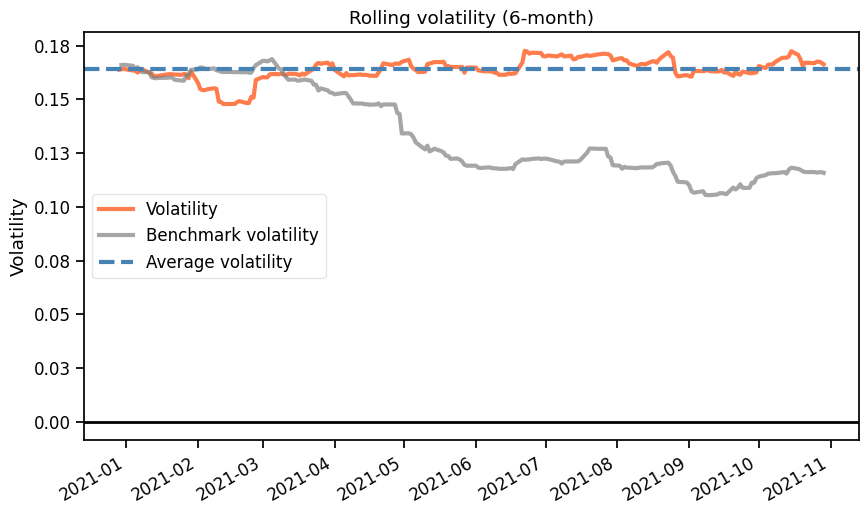

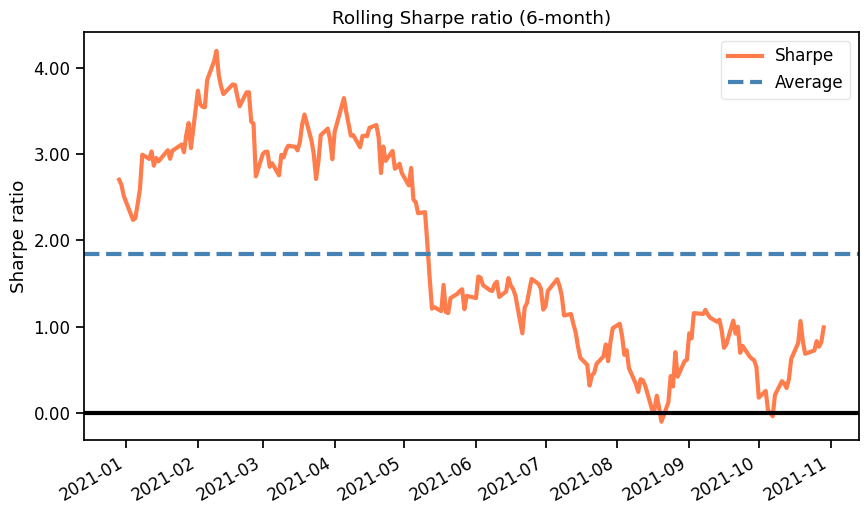

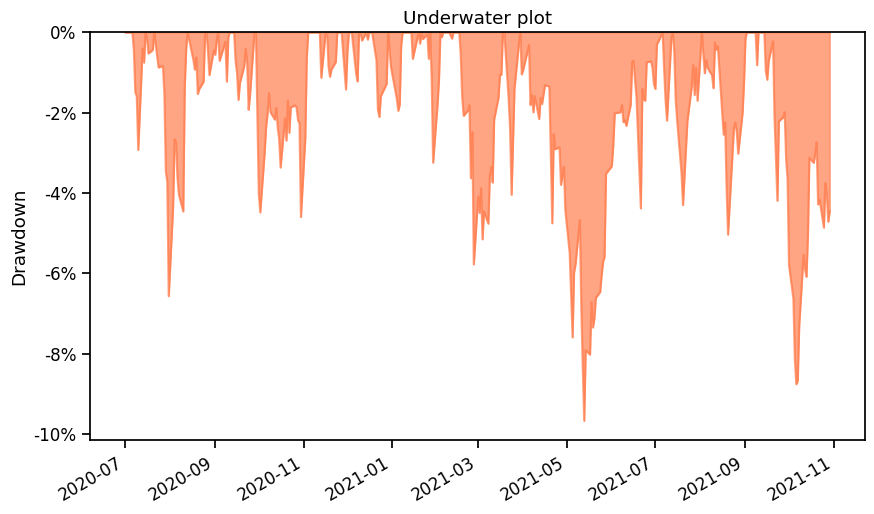

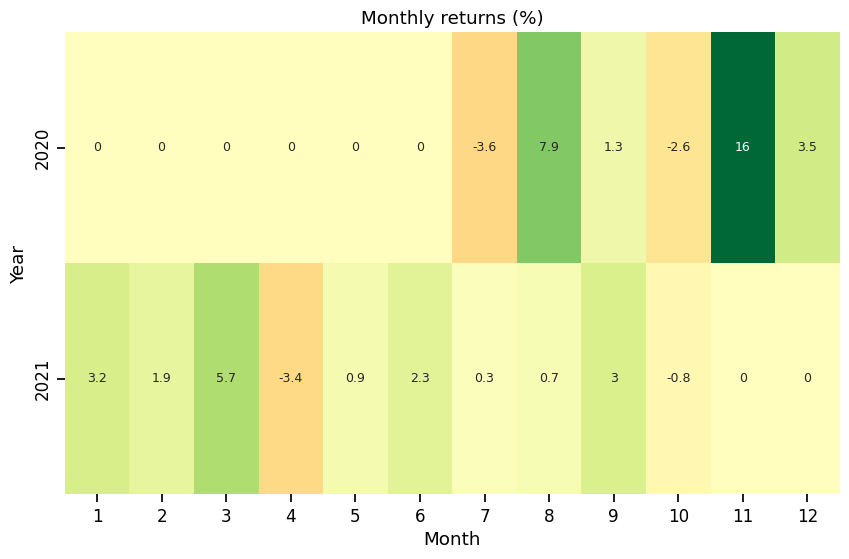

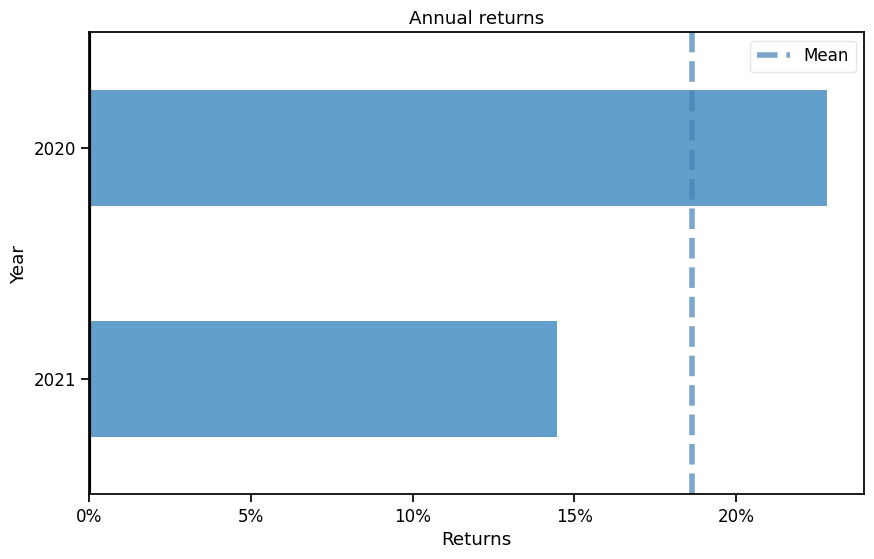

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])


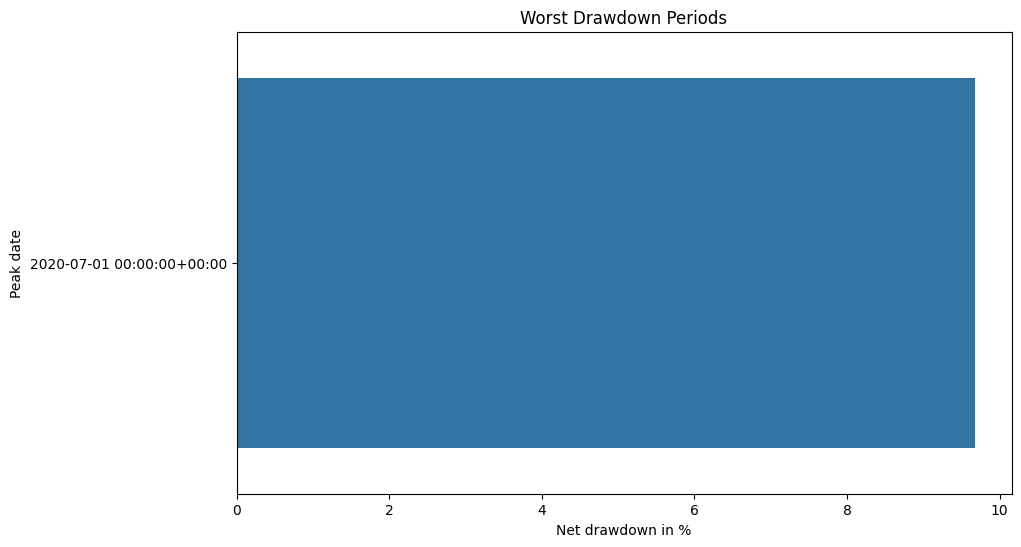

In [ ]:
import pyfolio as pf
import pandas as pd
import numpy as np
import empyrical
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your data is in the correct format
# Assuming DRL_strat and baseline_returns are your return series

# Convert index to datetime if it's not already
DRL_strat.index = pd.to_datetime(DRL_strat.index)
baseline_returns.index = pd.to_datetime(baseline_returns.index)

# Verify and convert if necessary
if not isinstance(DRL_strat.index, pd.DatetimeIndex):
    DRL_strat.index = pd.to_datetime(DRL_strat.index)

if not isinstance(baseline_returns.index, pd.DatetimeIndex):
    baseline_returns.index = pd.to_datetime(baseline_returns.index)

# Align both series to ensure they have the same dates
DRL_strat = DRL_strat.reindex(baseline_returns.index, method='ffill')
baseline_returns = baseline_returns.reindex(DRL_strat.index, method='ffill')

# Function to calculate drawdowns
def calculate_drawdowns(returns):
    cumulative_returns = empyrical.cum_returns(returns, starting_value=1.0)
    high_water_marks = cumulative_returns.cummax()
    drawdowns = cumulative_returns / high_water_marks - 1
    return drawdowns

# Function to create a drawdown table
def create_drawdown_table(returns, top=10):
    drawdowns = calculate_drawdowns(returns)
    drawdown_periods = []

    peak = 0
    valley = 0
    recovery = np.nan

    for t in range(1, len(drawdowns)):
        if drawdowns.iloc[t] < drawdowns.iloc[valley]:
            valley = t
        if drawdowns.iloc[t] > drawdowns.iloc[peak]:
            peak = t
            valley = t
        if np.isnan(recovery) and drawdowns.iloc[t] == 0:
            recovery = t
        if not np.isnan(recovery):
            drawdown_periods.append((peak, valley, recovery))
            recovery = np.nan  # Reset recovery to find the next one

    drawdown_df = pd.DataFrame(drawdown_periods, columns=['Peak', 'Valley', 'Recovery'])
    drawdown_df['Peak date'] = returns.index[drawdown_df['Peak']]
    drawdown_df['Valley date'] = returns.index[drawdown_df['Valley']]
    drawdown_df['Recovery date'] = returns.index[drawdown_df['Recovery']]
    drawdown_df['Net drawdown in %'] = [drawdowns.iloc[v] * -100 for v in drawdown_df['Valley']]
    drawdown_df = drawdown_df[['Peak date', 'Valley date', 'Recovery date', 'Net drawdown in %']]
    return drawdown_df.sort_values(by='Net drawdown in %', ascending=False).head(top)

# Function to print summary statistics
def print_summary_stats(returns, benchmark_rets):
    perf_stats = pf.timeseries.perf_stats(returns)
    benchmark_perf_stats = pf.timeseries.perf_stats(benchmark_rets)

    print("Start date:", returns.index[0])
    print("End date:", returns.index[-1])
    print("Total months:", len(returns) // 21)  # Approximation
    print("\nBacktest Performance")
    print(perf_stats)
    print("\nBenchmark Performance")
    print(benchmark_perf_stats)

    drawdown_table = create_drawdown_table(returns)
    print("\nWorst drawdown periods")
    print(drawdown_table)

# Define the plots to be generated
def plot_returns(returns, benchmark_rets):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_returns(returns, factor_returns=benchmark_rets, ax=ax)
    plt.show()

def plot_rolling_volatility(returns, benchmark_rets):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_volatility(returns, factor_returns=benchmark_rets, ax=ax)
    plt.show()

def plot_rolling_sharpe(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_sharpe(returns, ax=ax)
    plt.show()

def plot_drawdown_underwater(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_drawdown_underwater(returns, ax=ax)
    plt.show()

def plot_monthly_returns_heatmap(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_monthly_returns_heatmap(returns, ax=ax)
    plt.show()

def plot_annual_returns(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_annual_returns(returns, ax=ax)
    plt.show()

# Print summary statistics
print_summary_stats(DRL_strat, baseline_returns)

# Manually create the full tear sheet except the problematic plots
with pf.plotting.plotting_context(font_scale=1.1):
    plot_returns(DRL_strat, baseline_returns)
    plot_rolling_volatility(DRL_strat, baseline_returns)
    plot_rolling_sharpe(DRL_strat)
    plot_drawdown_underwater(DRL_strat)
    plot_monthly_returns_heatmap(DRL_strat)
    plot_annual_returns(DRL_strat)

# Manually create the drawdown plot
drawdown_table = create_drawdown_table(DRL_strat)

plt.figure(figsize=(10, 6))
sns.barplot(x='Net drawdown in %', y='Peak date', data=drawdown_table)
plt.title('Worst Drawdown Periods')
plt.xlabel('Net drawdown in %')
plt.ylabel('Peak date')
plt.show()


## Min-Variance Portfolio Allocation

In [ ]:
%pip install PyPortfolioOpt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models

In [ ]:
unique_tic = trade.tic.unique()
unique_trade_date = trade.date.unique()

In [ ]:
df.head()

,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,cov_list,return_list
0,2009-01-15,1450.0,1450.0,1390.00,742.939697,746780000,2914.T,3,-22.275674,833.114385,749.400526,40.731801,-102.669280,32.237892,824.859027,846.394481,"[[0.0011429674278560253, 0.0005771303072367979...",tic 2914.T 4063.T 4502.T 45...
1,2009-01-15,848.0,848.0,810.00,603.515320,21301000,4063.T,3,8.401165,672.551226,537.310749,47.614706,52.943248,10.078092,586.577165,618.665308,"[[0.0011429674278560253, 0.0005771303072367979...",tic 2914.T 4063.T 4502.T 45...
2,2009-01-15,4410.0,4410.0,4280.00,2247.196045,5344400,4502.T,3,-28.328313,2442.984382,2266.676458,43.517151,-225.070855,25.660746,2363.581177,2417.485856,"[[0.0011429674278560253, 0.0005771303072367979...",tic 2914.T 4063.T 4502.T 45...
3,2009-01-15,450.0,450.0,438.75,332.189911,18136800,4543.T,3,-14.478323,420.119181,337.481811,39.436157,-245.295069,39.024487,385.251858,387.475916,"[[0.0011429674278560253, 0.0005771303072367979...",tic 2914.T 4063.T 4502.T 45...
4,2009-01-15,1771.0,1771.0,1724.00,1353.361450,4465000,4911.T,3,-13.565233,1526.158075,1345.731293,42.535793,-43.695031,30.125229,1400.043461,1475.443880,"[[0.0011429674278560253, 0.0005771303072367979...",tic 2914.T 4063.T 4502.T 45...


In [ ]:
#calculate_portfolio_minimum_variance
portfolio = pd.DataFrame(index = range(1), columns = unique_trade_date)
initial_capital = 1000000
portfolio.loc[0,unique_trade_date[0]] = initial_capital

for i in range(len( unique_trade_date)-1):
    df_temp = df[df.date==unique_trade_date[i]].reset_index(drop=True)
    df_temp_next = df[df.date==unique_trade_date[i+1]].reset_index(drop=True)
    #Sigma = risk_models.sample_cov(df_temp.return_list[0])
    #calculate covariance matrix
    Sigma = df_temp.return_list[0].cov()
    #portfolio allocation
    ef_min_var = EfficientFrontier(None, Sigma,weight_bounds=(0, 0.1))
    #minimum variance
    raw_weights_min_var = ef_min_var.min_volatility()
    #get weights
    cleaned_weights_min_var = ef_min_var.clean_weights()

    #current capital
    cap = portfolio.iloc[0, i]
    #current cash invested for each stock
    current_cash = [element * cap for element in list(cleaned_weights_min_var.values())]
    # current held shares
    current_shares = list(np.array(current_cash)
                                      / np.array(df_temp.close))
    # next time period price
    next_price = np.array(df_temp_next.close)
    ##next_price * current share to calculate next total account value
    portfolio.iloc[0, i+1] = np.dot(current_shares, next_price)

portfolio=portfolio.T
portfolio.columns = ['account_value']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
portfolio.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,account_value
2020-07-01,1000000
2020-07-02,1004971.123637
2020-07-03,1010856.423667
2020-07-06,1023664.436615
2020-07-07,1020963.524478


In [ ]:
a2c_cumpod =(df_daily_return.daily_return+1).cumprod()-1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
min_var_cumpod =(portfolio.account_value.pct_change()+1).cumprod()-1

In [ ]:
dji_cumpod =(baseline_returns+1).cumprod()-1

## Plotly: DRL, Min-Variance, DJIA

In [ ]:
%pip install plotly

In [ ]:
from datetime import datetime as dt

import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

In [ ]:
time_ind = pd.Series(df_daily_return.date)

In [ ]:
trace0_portfolio = go.Scatter(x = time_ind, y = a2c_cumpod, mode = 'lines', name = 'A2C (Portfolio Allocation)')

trace1_portfolio = go.Scatter(x = time_ind, y = dji_cumpod, mode = 'lines', name = 'DJIA')
trace2_portfolio = go.Scatter(x = time_ind, y = min_var_cumpod, mode = 'lines', name = 'Min-Variance')
#trace3_portfolio = go.Scatter(x = time_ind, y = ddpg_cumpod, mode = 'lines', name = 'DDPG')
#trace4_portfolio = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')
#trace5_portfolio = go.Scatter(x = time_ind, y = min_cumpod, mode = 'lines', name = 'Min-Variance')

#trace4 = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')

#trace2 = go.Scatter(x = time_ind, y = portfolio_cost_minv, mode = 'lines', name = 'Min-Variance')
#trace3 = go.Scatter(x = time_ind, y = spx_value, mode = 'lines', name = 'SPX')

In [ ]:
fig = go.Figure()
fig.add_trace(trace0_portfolio)

fig.add_trace(trace1_portfolio)

fig.add_trace(trace2_portfolio)



fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=15,
            color="black"
        ),
        bgcolor="White",
        bordercolor="white",
        borderwidth=2

    ),
)
#fig.update_layout(legend_orientation="h")
fig.update_layout(title={
        #'text': "Cumulative Return using FinRL",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
#with Transaction cost
#fig.update_layout(title =  'Quarterly Trade Date')
fig.update_layout(
#    margin=dict(l=20, r=20, t=20, b=20),

    paper_bgcolor='rgba(1,1,0,0)',
    plot_bgcolor='rgba(1, 1, 0, 0)',
    #xaxis_title="Date",
    yaxis_title="Cumulative Return",
xaxis={'type': 'date',
       'tick0': time_ind[0],
        'tickmode': 'linear',
       'dtick': 86400000.0 *80}

)
fig.update_xaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='LightSteelBlue')

fig.show()

In [ ]:
"""### Model 2: **PPO**

"""

agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "learning_rate": 0.0001,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

trained_ppo = agent.train_model(model=model_ppo,
                             tb_log_name='ppo',
                             total_timesteps=80000)

trained_ppo.save('/content/trained_models/trained_ppo.zip')

"""### Model 3: **DDPG**

"""

agent = DRLAgent(env = env_train)
DDPG_PARAMS = {"batch_size": 128, "buffer_size": 50000, "learning_rate": 0.001}


model_ddpg = agent.get_model("ddpg",model_kwargs = DDPG_PARAMS)

trained_ddpg = agent.train_model(model=model_ddpg,
                             tb_log_name='ddpg',
                             total_timesteps=50000)

trained_ddpg.save('/content/trained_models/trained_ddpg.zip')

"""### Model 4: **SAC**

"""

agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0003,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

trained_sac = agent.train_model(model=model_sac,
                             tb_log_name='sac',
                             total_timesteps=50000)

trained_sac.save('/content/trained_models/trained_sac.zip')

"""### Model 5: **TD3**

"""

agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100,
              "buffer_size": 1000000,
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

trained_td3 = agent.train_model(model=model_td3,
                             tb_log_name='td3',
                             total_timesteps=30000)

trained_td3.save('/content/trained_models/trained_td3.zip')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.0001, 'batch_size': 128}
Using cpu device
----------------------------------
| time/              |           |
|    fps             | 248       |
|    iterations      | 1         |
|    time_elapsed    | 8         |
|    total_timesteps | 2048      |
| train/             |           |
|    reward          | 4484420.5 |
----------------------------------
begin_total_asset:1000000
end_total_asset:5668342.773818445
Sharpe:  0.8241812875096752
-------------------------------------------
| time/                   |               |
|    fps                  | 126           |
|    iterations           | 2             |
|    time_elapsed         | 32            |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 1.1641532e-10 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -41.1         |
|    explained_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



begin_total_asset:1000000
end_total_asset:1428304.4363048598
Sharpe:  1.7450572547955396
hit end!


/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

[*********************100%%**********************]  1 of 1 completed

==============DRL Strategy Stats===========
==============Get Baseline Stats===========
Shape of DataFrame:  (336, 8)


Annual return          0.279047
Cumulative returns     0.388402
Annual volatility      0.139129
Sharpe ratio           1.844560
Calmar ratio           3.124551
Stability              0.918675
Max drawdown          -0.089308
Omega ratio            1.358960
Sortino ratio          2.734872
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.052781
Daily value at risk   -0.016510
dtype: float64
Start date: 2020-07-01 00:00:00+00:00
End date: 2021-10-29 00:00:00+00:00
Total months: 16

Backtest Performance
Annual return          0.282039
Cumulative returns     0.394108
Annual volatility      0.165420
Sharpe ratio           1.585117
Calmar ratio           3.053648
Stability              0.829652
Max drawdown          -0.092361
Omega ratio            1.296267
Sortino ratio          2.421572
Skew                  -0.075531
Kurtosis               0.410027
Tail ratio             1.112311
Daily value at risk   -0.019800
dtype: float64

Benchmark Performance
An

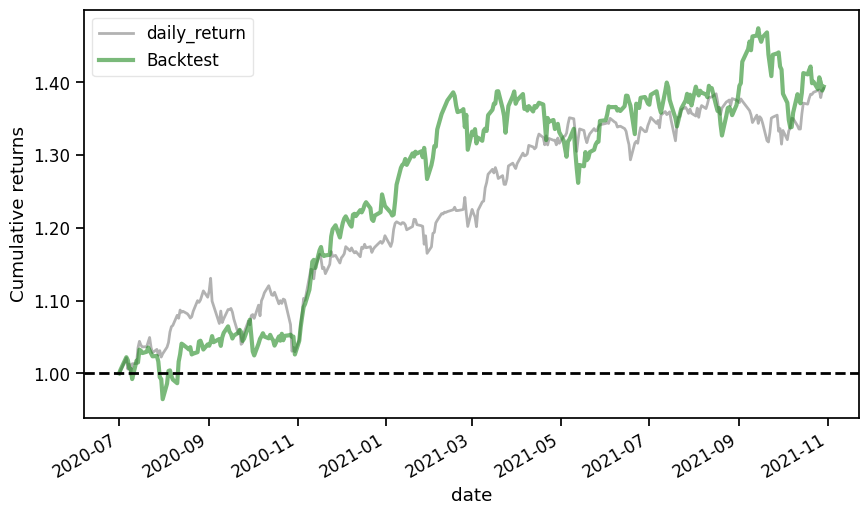

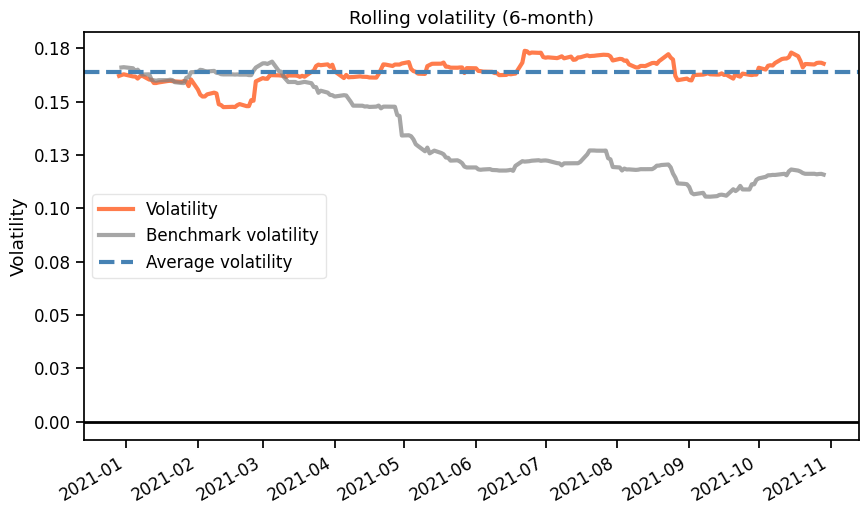

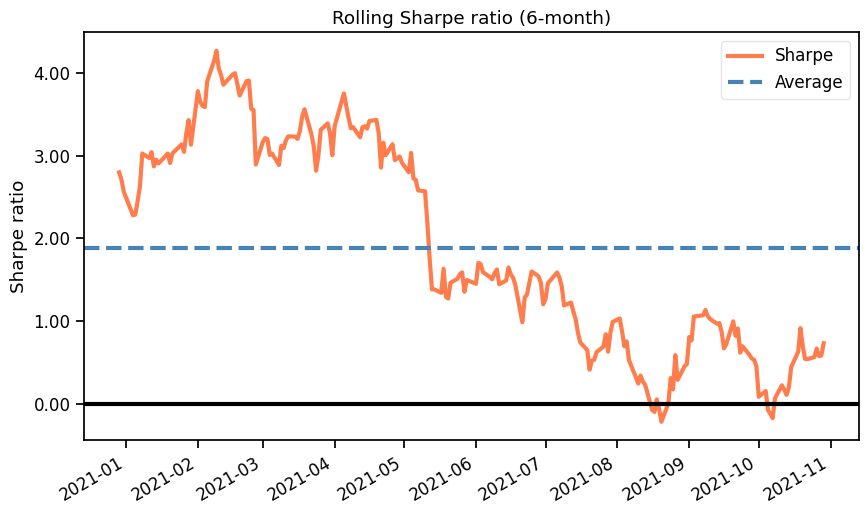

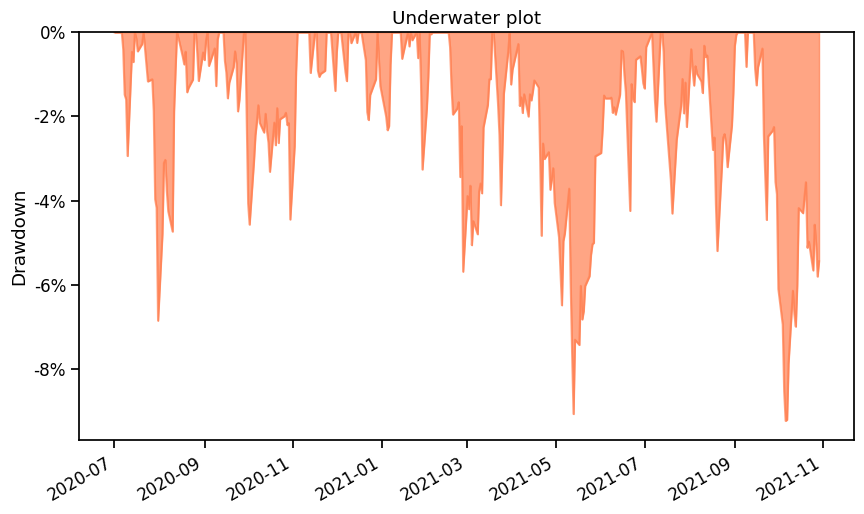

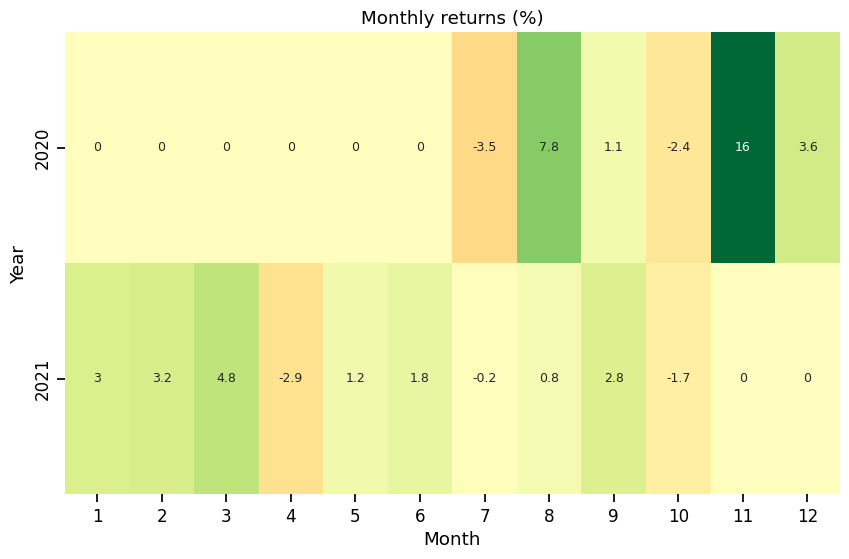

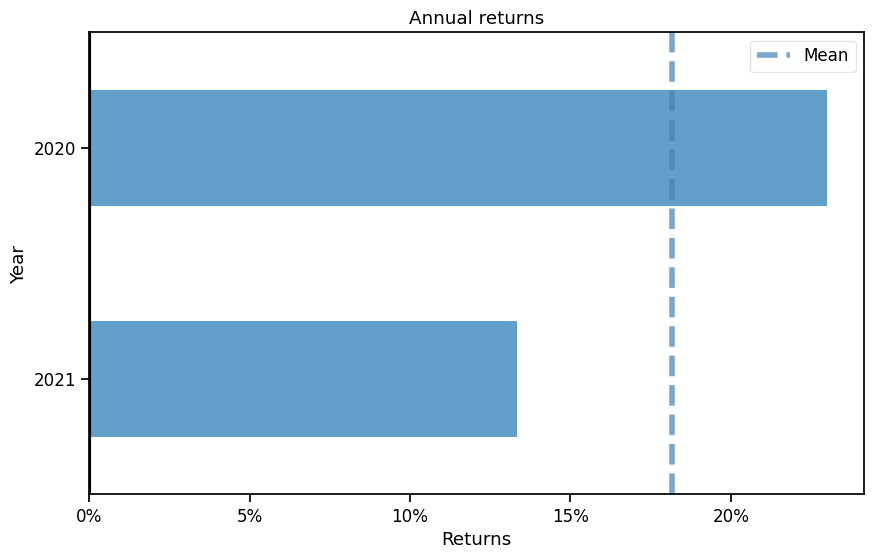

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



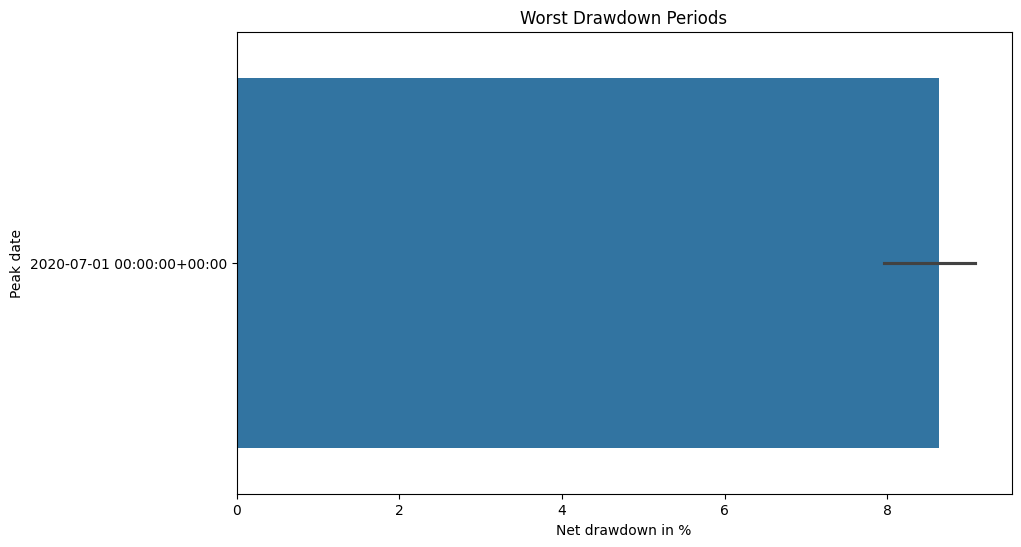

In [ ]:
trade = data_split(df,'2020-07-01', '2021-10-31')
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)

trade.shape

df_daily_return, df_actions = DRLAgent.DRL_prediction(model=trained_ppo,
                        environment = e_trade_gym)

df_daily_return.head()

df_daily_return.to_csv('df_daily_return.csv')

df_actions.head()

df_actions.to_csv('df_actions.csv')

"""<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class
"""

from pyfolio import timeseries
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return)
perf_func = timeseries.perf_stats
perf_stats_all = perf_func( returns=DRL_strat,
                              factor_returns=DRL_strat,
                                positions=None, transactions=None, turnover_denom="AGB")

print("==============DRL Strategy Stats===========")
perf_stats_all

#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI",
        start = df_daily_return.loc[0,'date'],
        end = df_daily_return.loc[len(df_daily_return)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

"""<a id='6.2'></a>
## 7.2 BackTestPlot
"""

import pyfolio

import pyfolio as pf
import pandas as pd
import numpy as np
import empyrical
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your data is in the correct format
# Assuming DRL_strat and baseline_returns are your return series

# Convert index to datetime if it's not already
DRL_strat.index = pd.to_datetime(DRL_strat.index)
baseline_returns.index = pd.to_datetime(baseline_returns.index)

# Verify and convert if necessary
if not isinstance(DRL_strat.index, pd.DatetimeIndex):
    DRL_strat.index = pd.to_datetime(DRL_strat.index)

if not isinstance(baseline_returns.index, pd.DatetimeIndex):
    baseline_returns.index = pd.to_datetime(baseline_returns.index)

# Align both series to ensure they have the same dates
DRL_strat = DRL_strat.reindex(baseline_returns.index, method='ffill')
baseline_returns = baseline_returns.reindex(DRL_strat.index, method='ffill')

# Function to calculate drawdowns
def calculate_drawdowns(returns):
    cumulative_returns = empyrical.cum_returns(returns, starting_value=1.0)
    high_water_marks = cumulative_returns.cummax()
    drawdowns = cumulative_returns / high_water_marks - 1
    return drawdowns

# Function to create a drawdown table
def create_drawdown_table(returns, top=10):
    drawdowns = calculate_drawdowns(returns)
    drawdown_periods = []

    peak = 0
    valley = 0
    recovery = np.nan

    for t in range(1, len(drawdowns)):
        if drawdowns.iloc[t] < drawdowns.iloc[valley]:
            valley = t
        if drawdowns.iloc[t] > drawdowns.iloc[peak]:
            peak = t
            valley = t
        if np.isnan(recovery) and drawdowns.iloc[t] == 0:
            recovery = t
        if not np.isnan(recovery):
            drawdown_periods.append((peak, valley, recovery))
            recovery = np.nan  # Reset recovery to find the next one

    drawdown_df = pd.DataFrame(drawdown_periods, columns=['Peak', 'Valley', 'Recovery'])
    drawdown_df['Peak date'] = returns.index[drawdown_df['Peak']]
    drawdown_df['Valley date'] = returns.index[drawdown_df['Valley']]
    drawdown_df['Recovery date'] = returns.index[drawdown_df['Recovery']]
    drawdown_df['Net drawdown in %'] = [drawdowns.iloc[v] * -100 for v in drawdown_df['Valley']]
    drawdown_df = drawdown_df[['Peak date', 'Valley date', 'Recovery date', 'Net drawdown in %']]
    return drawdown_df.sort_values(by='Net drawdown in %', ascending=False).head(top)

# Function to print summary statistics
def print_summary_stats(returns, benchmark_rets):
    perf_stats = pf.timeseries.perf_stats(returns)
    benchmark_perf_stats = pf.timeseries.perf_stats(benchmark_rets)

    print("Start date:", returns.index[0])
    print("End date:", returns.index[-1])
    print("Total months:", len(returns) // 21)  # Approximation
    print("\nBacktest Performance")
    print(perf_stats)
    print("\nBenchmark Performance")
    print(benchmark_perf_stats)

    drawdown_table = create_drawdown_table(returns)
    print("\nWorst drawdown periods")
    print(drawdown_table)

# Define the plots to be generated
def plot_returns(returns, benchmark_rets):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_returns(returns, factor_returns=benchmark_rets, ax=ax)
    plt.show()

def plot_rolling_volatility(returns, benchmark_rets):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_volatility(returns, factor_returns=benchmark_rets, ax=ax)
    plt.show()

def plot_rolling_sharpe(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_sharpe(returns, ax=ax)
    plt.show()

def plot_drawdown_underwater(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_drawdown_underwater(returns, ax=ax)
    plt.show()

def plot_monthly_returns_heatmap(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_monthly_returns_heatmap(returns, ax=ax)
    plt.show()

def plot_annual_returns(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_annual_returns(returns, ax=ax)
    plt.show()

# Print summary statistics
print_summary_stats(DRL_strat, baseline_returns)

# Manually create the full tear sheet except the problematic plots
with pf.plotting.plotting_context(font_scale=1.1):
    plot_returns(DRL_strat, baseline_returns)
    plot_rolling_volatility(DRL_strat, baseline_returns)
    plot_rolling_sharpe(DRL_strat)
    plot_drawdown_underwater(DRL_strat)
    plot_monthly_returns_heatmap(DRL_strat)
    plot_annual_returns(DRL_strat)

# Manually create the drawdown plot
drawdown_table = create_drawdown_table(DRL_strat)

plt.figure(figsize=(10, 6))
sns.barplot(x='Net drawdown in %', y='Peak date', data=drawdown_table)
plt.title('Worst Drawdown Periods')
plt.xlabel('Net drawdown in %')
plt.ylabel('Peak date')
plt.show()

"""## Min-Variance Portfolio Allocation"""

# Commented out IPython magic to ensure Python compatibility.
# %pip install PyPortfolioOpt

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models

unique_tic = trade.tic.unique()
unique_trade_date = trade.date.unique()

df.head()

#calculate_portfolio_minimum_variance
portfolio = pd.DataFrame(index = range(1), columns = unique_trade_date)
initial_capital = 1000000
portfolio.loc[0,unique_trade_date[0]] = initial_capital

for i in range(len( unique_trade_date)-1):
    df_temp = df[df.date==unique_trade_date[i]].reset_index(drop=True)
    df_temp_next = df[df.date==unique_trade_date[i+1]].reset_index(drop=True)
    #Sigma = risk_models.sample_cov(df_temp.return_list[0])
    #calculate covariance matrix
    Sigma = df_temp.return_list[0].cov()
    #portfolio allocation
    ef_min_var = EfficientFrontier(None, Sigma,weight_bounds=(0, 0.1))
    #minimum variance
    raw_weights_min_var = ef_min_var.min_volatility()
    #get weights
    cleaned_weights_min_var = ef_min_var.clean_weights()

    #current capital
    cap = portfolio.iloc[0, i]
    #current cash invested for each stock
    current_cash = [element * cap for element in list(cleaned_weights_min_var.values())]
    # current held shares
    current_shares = list(np.array(current_cash)
                                      / np.array(df_temp.close))
    # next time period price
    next_price = np.array(df_temp_next.close)
    ##next_price * current share to calculate next total account value
    portfolio.iloc[0, i+1] = np.dot(current_shares, next_price)

portfolio=portfolio.T
portfolio.columns = ['account_value']

portfolio.head()

a2c_cumpod =(df_daily_return.daily_return+1).cumprod()-1

min_var_cumpod =(portfolio.account_value.pct_change()+1).cumprod()-1

dji_cumpod =(baseline_returns+1).cumprod()-1

"""## Plotly: DRL, Min-Variance, DJIA"""

# Commented out IPython magic to ensure Python compatibility.
# %pip install plotly

from datetime import datetime as dt

import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

time_ind = pd.Series(df_daily_return.date)

trace0_portfolio = go.Scatter(x = time_ind, y = a2c_cumpod, mode = 'lines', name = 'PPO')

trace1_portfolio = go.Scatter(x = time_ind, y = dji_cumpod, mode = 'lines', name = 'DJIA')
trace2_portfolio = go.Scatter(x = time_ind, y = min_var_cumpod, mode = 'lines', name = 'Min-Variance')
#trace3_portfolio = go.Scatter(x = time_ind, y = ddpg_cumpod, mode = 'lines', name = 'DDPG')
#trace4_portfolio = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')
#trace5_portfolio = go.Scatter(x = time_ind, y = min_cumpod, mode = 'lines', name = 'Min-Variance')

#trace4 = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')

#trace2 = go.Scatter(x = time_ind, y = portfolio_cost_minv, mode = 'lines', name = 'Min-Variance')
#trace3 = go.Scatter(x = time_ind, y = spx_value, mode = 'lines', name = 'SPX')

fig = go.Figure()
fig.add_trace(trace0_portfolio)

fig.add_trace(trace1_portfolio)

fig.add_trace(trace2_portfolio)



fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=15,
            color="black"
        ),
        bgcolor="White",
        bordercolor="white",
        borderwidth=2

    ),
)
#fig.update_layout(legend_orientation="h")
fig.update_layout(title={
        #'text': "Cumulative Return using FinRL",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
#with Transaction cost
#fig.update_layout(title =  'Quarterly Trade Date')
fig.update_layout(
#    margin=dict(l=20, r=20, t=20, b=20),

    paper_bgcolor='rgba(1,1,0,0)',
    plot_bgcolor='rgba(1, 1, 0, 0)',
    #xaxis_title="Date",
    yaxis_title="Cumulative Return",
xaxis={'type': 'date',
       'tick0': time_ind[0],
        'tickmode': 'linear',
       'dtick': 86400000.0 *80}

)
fig.update_xaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='LightSteelBlue')

fig.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



begin_total_asset:1000000
end_total_asset:1461068.1275790015
Sharpe:  1.8281968691214632
hit end!
==============DRL Strategy Stats===========
==============Get Baseline Stats===========


/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

[*********************100%%**********************]  1 of 1 completed


Shape of DataFrame:  (336, 8)
Annual return          0.279047
Cumulative returns     0.388402
Annual volatility      0.139129
Sharpe ratio           1.844560
Calmar ratio           3.124551
Stability              0.918675
Max drawdown          -0.089308
Omega ratio            1.358960
Sortino ratio          2.734872
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.052781
Daily value at risk   -0.016510
dtype: float64
Shape of DataFrame:  (337, 8)
Start date: 2020-07-01 00:00:00+00:00
End date: 2021-10-29 00:00:00+00:00
Total months: 16

Backtest Performance
Annual return          0.298789
Cumulative returns     0.418520
Annual volatility      0.167933
Sharpe ratio           1.641255
Calmar ratio           3.152278
Stability              0.832798
Max drawdown          -0.094785
Omega ratio            1.309727
Sortino ratio          2.508406
Skew                  -0.072427
Kurtosis               0.468377
Tail ratio             1.103443
Daily value 

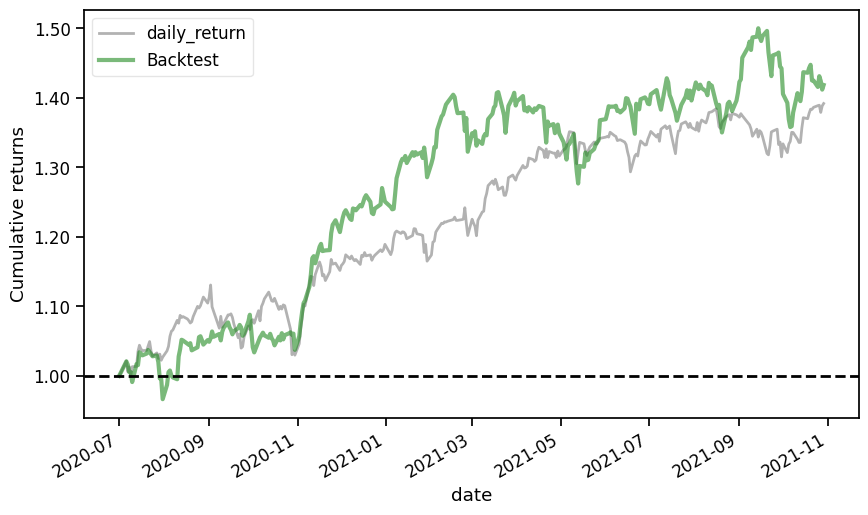

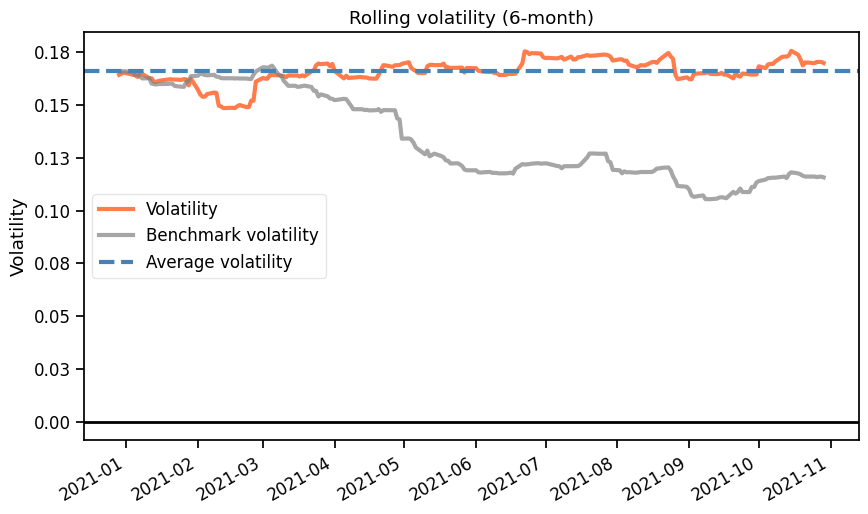

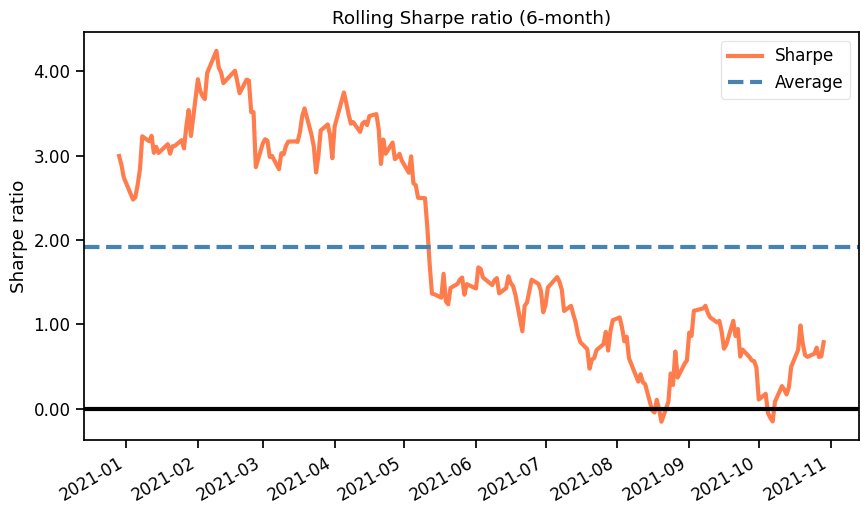

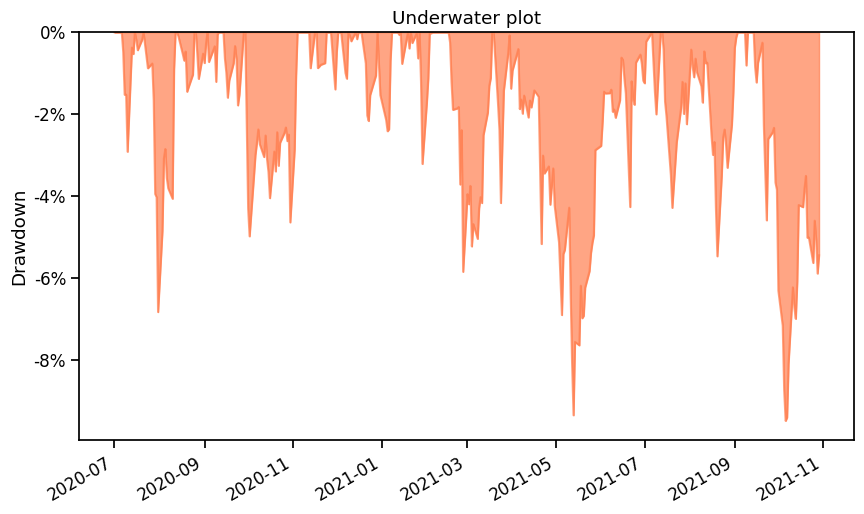

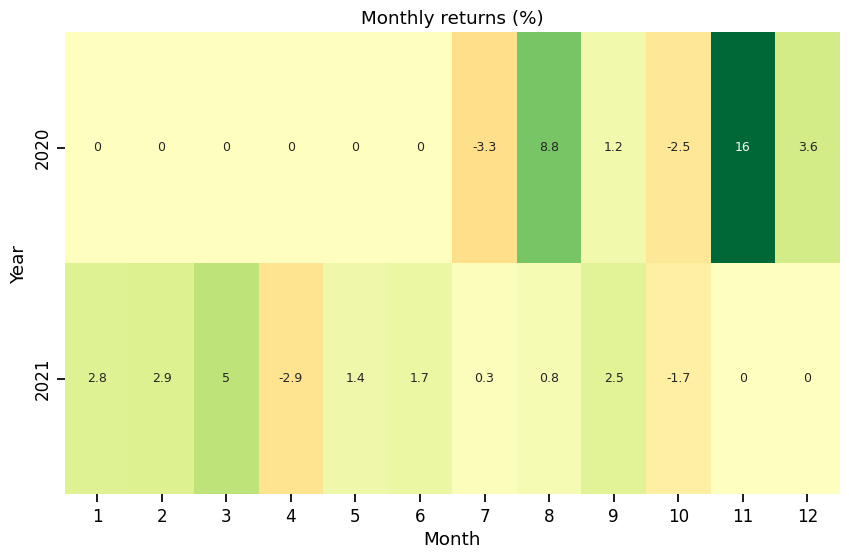

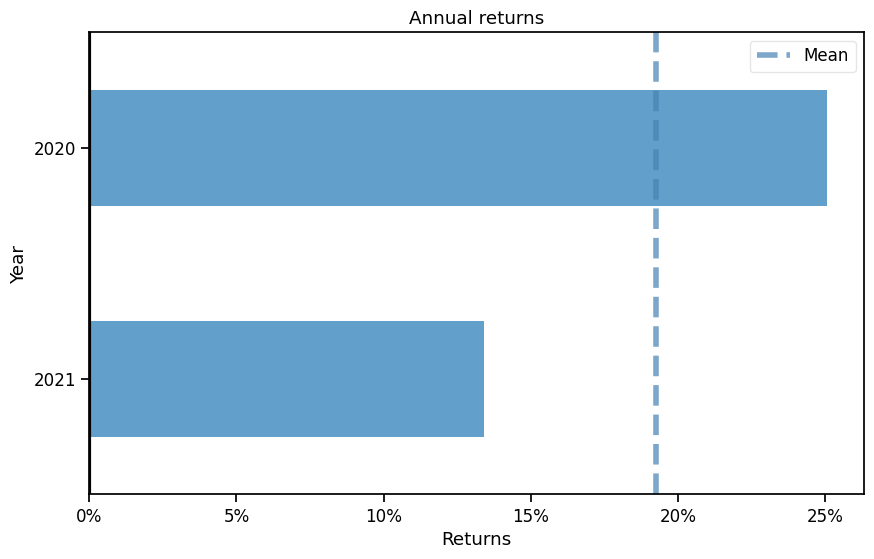

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



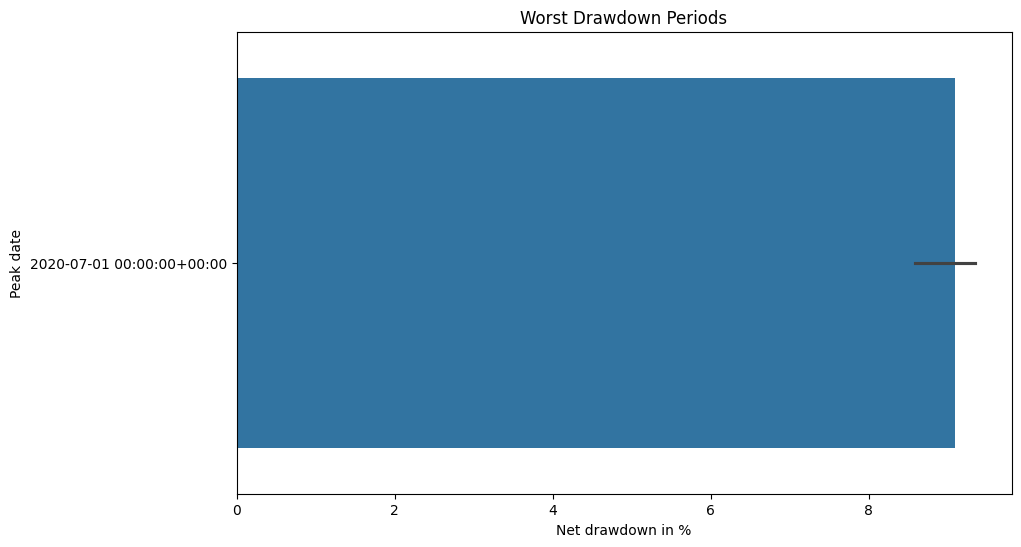

In [ ]:
trade = data_split(df,'2020-07-01', '2021-10-31')
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)

trade.shape

df_daily_return, df_actions = DRLAgent.DRL_prediction(model=trained_ddpg,
                        environment = e_trade_gym)

df_daily_return.head()

df_daily_return.to_csv('df_daily_return.csv')

df_actions.head()

df_actions.to_csv('df_actions.csv')

"""<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class
"""

from pyfolio import timeseries
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return)
perf_func = timeseries.perf_stats
perf_stats_all = perf_func( returns=DRL_strat,
                              factor_returns=DRL_strat,
                                positions=None, transactions=None, turnover_denom="AGB")

print("==============DRL Strategy Stats===========")
perf_stats_all

#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI",
        start = df_daily_return.loc[0,'date'],
        end = df_daily_return.loc[len(df_daily_return)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

"""<a id='6.2'></a>
## 7.2 BackTestPlot
"""

import pyfolio

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline

baseline_df = get_baseline(
        ticker='^DJI', start=df_daily_return.loc[0,'date'], end='2021-11-01'
    )
baseline_returns = get_daily_return(baseline_df, value_col_name="close")
import pyfolio as pf
import pandas as pd
import numpy as np
import empyrical
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your data is in the correct format
# Assuming DRL_strat and baseline_returns are your return series

# Convert index to datetime if it's not already
DRL_strat.index = pd.to_datetime(DRL_strat.index)
baseline_returns.index = pd.to_datetime(baseline_returns.index)

# Verify and convert if necessary
if not isinstance(DRL_strat.index, pd.DatetimeIndex):
    DRL_strat.index = pd.to_datetime(DRL_strat.index)

if not isinstance(baseline_returns.index, pd.DatetimeIndex):
    baseline_returns.index = pd.to_datetime(baseline_returns.index)

# Align both series to ensure they have the same dates
DRL_strat = DRL_strat.reindex(baseline_returns.index, method='ffill')
baseline_returns = baseline_returns.reindex(DRL_strat.index, method='ffill')

# Function to calculate drawdowns
def calculate_drawdowns(returns):
    cumulative_returns = empyrical.cum_returns(returns, starting_value=1.0)
    high_water_marks = cumulative_returns.cummax()
    drawdowns = cumulative_returns / high_water_marks - 1
    return drawdowns

# Function to create a drawdown table
def create_drawdown_table(returns, top=10):
    drawdowns = calculate_drawdowns(returns)
    drawdown_periods = []

    peak = 0
    valley = 0
    recovery = np.nan

    for t in range(1, len(drawdowns)):
        if drawdowns.iloc[t] < drawdowns.iloc[valley]:
            valley = t
        if drawdowns.iloc[t] > drawdowns.iloc[peak]:
            peak = t
            valley = t
        if np.isnan(recovery) and drawdowns.iloc[t] == 0:
            recovery = t
        if not np.isnan(recovery):
            drawdown_periods.append((peak, valley, recovery))
            recovery = np.nan  # Reset recovery to find the next one

    drawdown_df = pd.DataFrame(drawdown_periods, columns=['Peak', 'Valley', 'Recovery'])
    drawdown_df['Peak date'] = returns.index[drawdown_df['Peak']]
    drawdown_df['Valley date'] = returns.index[drawdown_df['Valley']]
    drawdown_df['Recovery date'] = returns.index[drawdown_df['Recovery']]
    drawdown_df['Net drawdown in %'] = [drawdowns.iloc[v] * -100 for v in drawdown_df['Valley']]
    drawdown_df = drawdown_df[['Peak date', 'Valley date', 'Recovery date', 'Net drawdown in %']]
    return drawdown_df.sort_values(by='Net drawdown in %', ascending=False).head(top)

# Function to print summary statistics
def print_summary_stats(returns, benchmark_rets):
    perf_stats = pf.timeseries.perf_stats(returns)
    benchmark_perf_stats = pf.timeseries.perf_stats(benchmark_rets)

    print("Start date:", returns.index[0])
    print("End date:", returns.index[-1])
    print("Total months:", len(returns) // 21)  # Approximation
    print("\nBacktest Performance")
    print(perf_stats)
    print("\nBenchmark Performance")
    print(benchmark_perf_stats)

    drawdown_table = create_drawdown_table(returns)
    print("\nWorst drawdown periods")
    print(drawdown_table)

# Define the plots to be generated
def plot_returns(returns, benchmark_rets):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_returns(returns, factor_returns=benchmark_rets, ax=ax)
    plt.show()

def plot_rolling_volatility(returns, benchmark_rets):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_volatility(returns, factor_returns=benchmark_rets, ax=ax)
    plt.show()

def plot_rolling_sharpe(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_sharpe(returns, ax=ax)
    plt.show()

def plot_drawdown_underwater(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_drawdown_underwater(returns, ax=ax)
    plt.show()

def plot_monthly_returns_heatmap(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_monthly_returns_heatmap(returns, ax=ax)
    plt.show()

def plot_annual_returns(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_annual_returns(returns, ax=ax)
    plt.show()

# Print summary statistics
print_summary_stats(DRL_strat, baseline_returns)

# Manually create the full tear sheet except the problematic plots
with pf.plotting.plotting_context(font_scale=1.1):
    plot_returns(DRL_strat, baseline_returns)
    plot_rolling_volatility(DRL_strat, baseline_returns)
    plot_rolling_sharpe(DRL_strat)
    plot_drawdown_underwater(DRL_strat)
    plot_monthly_returns_heatmap(DRL_strat)
    plot_annual_returns(DRL_strat)

# Manually create the drawdown plot
drawdown_table = create_drawdown_table(DRL_strat)

plt.figure(figsize=(10, 6))
sns.barplot(x='Net drawdown in %', y='Peak date', data=drawdown_table)
plt.title('Worst Drawdown Periods')
plt.xlabel('Net drawdown in %')
plt.ylabel('Peak date')
plt.show()

"""## Min-Variance Portfolio Allocation"""

# Commented out IPython magic to ensure Python compatibility.
# %pip install PyPortfolioOpt

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models

unique_tic = trade.tic.unique()
unique_trade_date = trade.date.unique()

df.head()

#calculate_portfolio_minimum_variance
portfolio = pd.DataFrame(index = range(1), columns = unique_trade_date)
initial_capital = 1000000
portfolio.loc[0,unique_trade_date[0]] = initial_capital

for i in range(len( unique_trade_date)-1):
    df_temp = df[df.date==unique_trade_date[i]].reset_index(drop=True)
    df_temp_next = df[df.date==unique_trade_date[i+1]].reset_index(drop=True)
    #Sigma = risk_models.sample_cov(df_temp.return_list[0])
    #calculate covariance matrix
    Sigma = df_temp.return_list[0].cov()
    #portfolio allocation
    ef_min_var = EfficientFrontier(None, Sigma,weight_bounds=(0, 0.1))
    #minimum variance
    raw_weights_min_var = ef_min_var.min_volatility()
    #get weights
    cleaned_weights_min_var = ef_min_var.clean_weights()

    #current capital
    cap = portfolio.iloc[0, i]
    #current cash invested for each stock
    current_cash = [element * cap for element in list(cleaned_weights_min_var.values())]
    # current held shares
    current_shares = list(np.array(current_cash)
                                      / np.array(df_temp.close))
    # next time period price
    next_price = np.array(df_temp_next.close)
    ##next_price * current share to calculate next total account value
    portfolio.iloc[0, i+1] = np.dot(current_shares, next_price)

portfolio=portfolio.T
portfolio.columns = ['account_value']

portfolio.head()

a2c_cumpod =(df_daily_return.daily_return+1).cumprod()-1

min_var_cumpod =(portfolio.account_value.pct_change()+1).cumprod()-1

dji_cumpod =(baseline_returns+1).cumprod()-1

"""## Plotly: DRL, Min-Variance, DJIA"""

# Commented out IPython magic to ensure Python compatibility.
# %pip install plotly

from datetime import datetime as dt

import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

time_ind = pd.Series(df_daily_return.date)

trace0_portfolio = go.Scatter(x = time_ind, y = a2c_cumpod, mode = 'lines', name = 'DDPG (Portfolio Allocation)')

trace1_portfolio = go.Scatter(x = time_ind, y = dji_cumpod, mode = 'lines', name = 'DJIA')
trace2_portfolio = go.Scatter(x = time_ind, y = min_var_cumpod, mode = 'lines', name = 'Min-Variance')
#trace3_portfolio = go.Scatter(x = time_ind, y = ddpg_cumpod, mode = 'lines', name = 'DDPG')
#trace4_portfolio = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')
#trace5_portfolio = go.Scatter(x = time_ind, y = min_cumpod, mode = 'lines', name = 'Min-Variance')

#trace4 = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')

#trace2 = go.Scatter(x = time_ind, y = portfolio_cost_minv, mode = 'lines', name = 'Min-Variance')
#trace3 = go.Scatter(x = time_ind, y = spx_value, mode = 'lines', name = 'SPX')

fig = go.Figure()
fig.add_trace(trace0_portfolio)

fig.add_trace(trace1_portfolio)

fig.add_trace(trace2_portfolio)



fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=15,
            color="black"
        ),
        bgcolor="White",
        bordercolor="white",
        borderwidth=2

    ),
)
#fig.update_layout(legend_orientation="h")
fig.update_layout(title={
        #'text': "Cumulative Return using FinRL",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
#with Transaction cost
#fig.update_layout(title =  'Quarterly Trade Date')
fig.update_layout(
#    margin=dict(l=20, r=20, t=20, b=20),

    paper_bgcolor='rgba(1,1,0,0)',
    plot_bgcolor='rgba(1, 1, 0, 0)',
    #xaxis_title="Date",
    yaxis_title="Cumulative Return",
xaxis={'type': 'date',
       'tick0': time_ind[0],
        'tickmode': 'linear',
       'dtick': 86400000.0 *80}

)
fig.update_xaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='LightSteelBlue')

fig.show()



In [ ]:
%matplotlib inline

baseline_df = get_baseline(
        ticker='^DJI', start=df_daily_return.loc[0,'date'], end='2021-11-01'
    )
baseline_returns = get_daily_return(baseline_df, value_col_name="close")

with pyfolio.plotting.plotting_context(font_scale=1.1):
        pyfolio.create_full_tear_sheet(returns = DRL_strat,
                                       benchmark_rets=baseline_returns, set_context=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

[*********************100%%**********************]  1 of 1 completed

Shape of DataFrame:  (337, 8)



/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



Start date,2020-07-01
End date,2021-10-29
Total months,16
,Backtest
Annual return,29.9%
Cumulative returns,41.9%
Annual volatility,16.8%
Sharpe ratio,1.64
Calmar ratio,3.15
Stability,0.83
Max drawdown,-9.5%


AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

[*********************100%%**********************]  1 of 1 completed

begin_total_asset:1000000
end_total_asset:1401246.2383708037
Sharpe:  1.6847774304110854
hit end!
==============DRL Strategy Stats===========
==============Get Baseline Stats===========
Shape of DataFrame:  (336, 8)
Annual return          0.279047
Cumulative returns     0.388402
Annual volatility      0.139129
Sharpe ratio           1.844560
Calmar ratio           3.124551
Stability              0.918675
Max drawdown          -0.089308
Omega ratio            1.358960
Sortino ratio          2.734872
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.052781
Daily value at risk   -0.016510
dtype: float64
Shape of DataFrame:  (337, 8)


Start date: 2020-07-01 00:00:00+00:00
End date: 2021-10-29 00:00:00+00:00
Total months: 16

Backtest Performance
Annual return          0.272339
Cumulative returns     0.380020
Annual volatility      0.161629
Sharpe ratio           1.571441
Calmar ratio           3.236795
Stability              0.853502
Max drawdown          -0.084138
Omega ratio            1.295675
Sortino ratio          2.406457
Skew                  -0.072078
Kurtosis               0.461660
Tail ratio             1.109420
Daily value at risk   -0.019355
dtype: float64

Benchmark Performance
Annual return          0.280495
Cumulative returns     0.391863
Annual volatility      0.138927
Sharpe ratio           1.855203
Calmar ratio           3.140767
Stability              0.918753
Max drawdown          -0.089308
Omega ratio            1.361583
Sortino ratio          2.750755
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.053708
Daily value at risk   -0.016480
dtype: float64

W

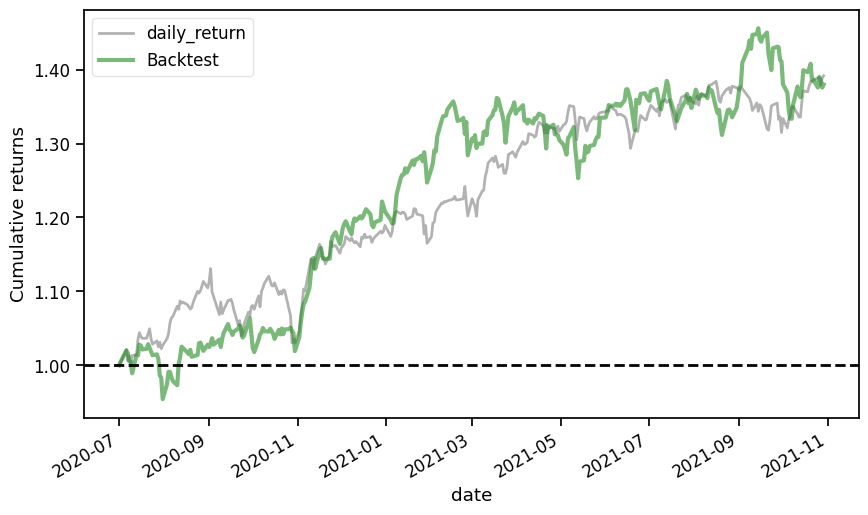

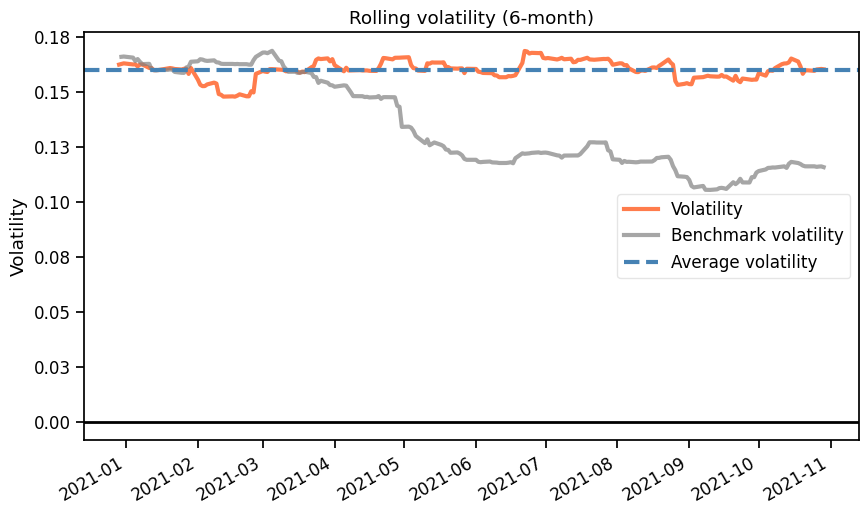

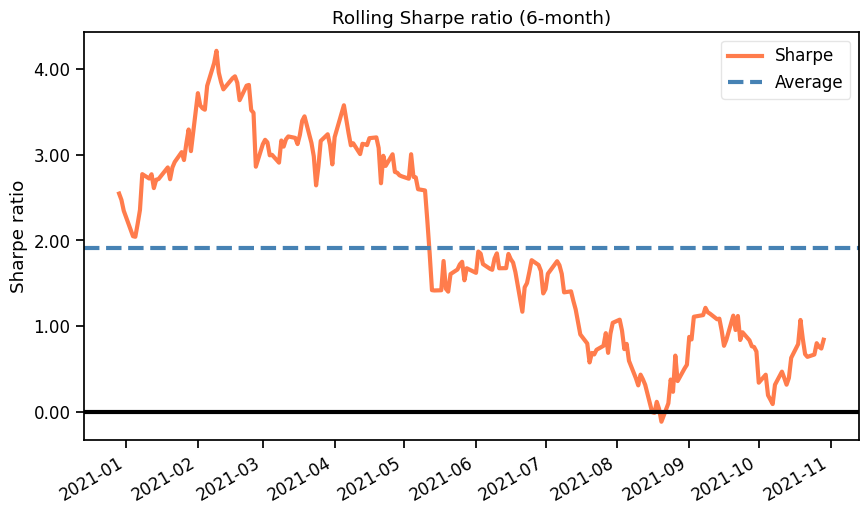

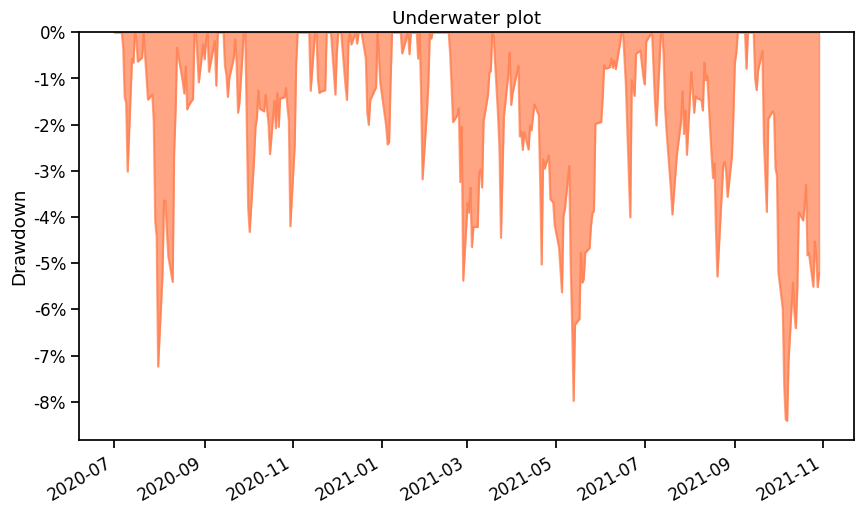

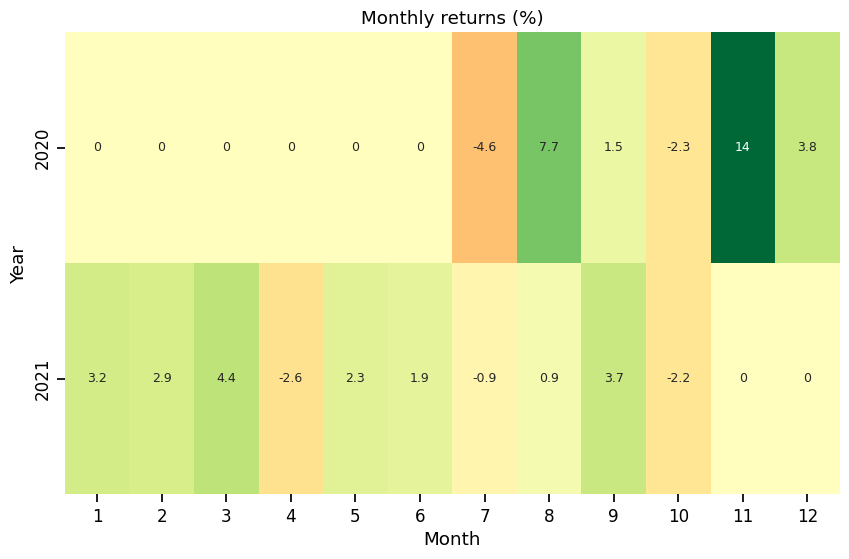

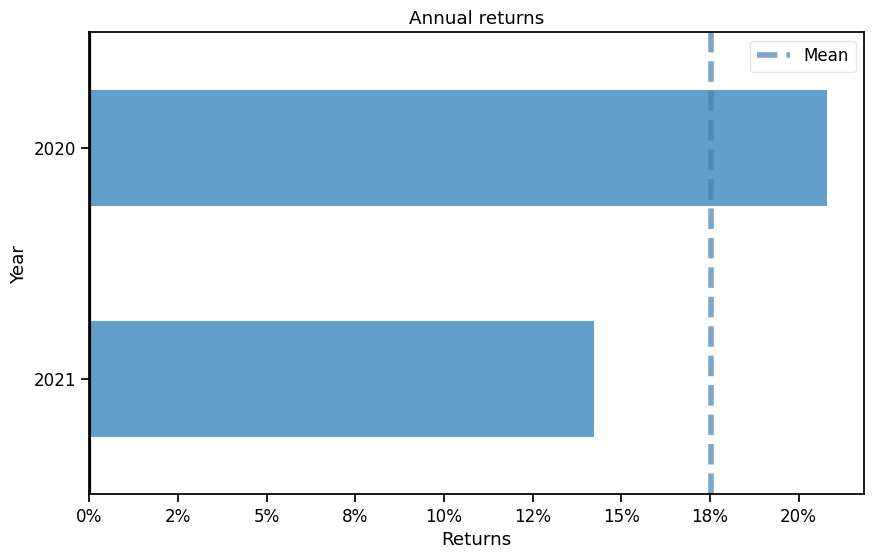

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



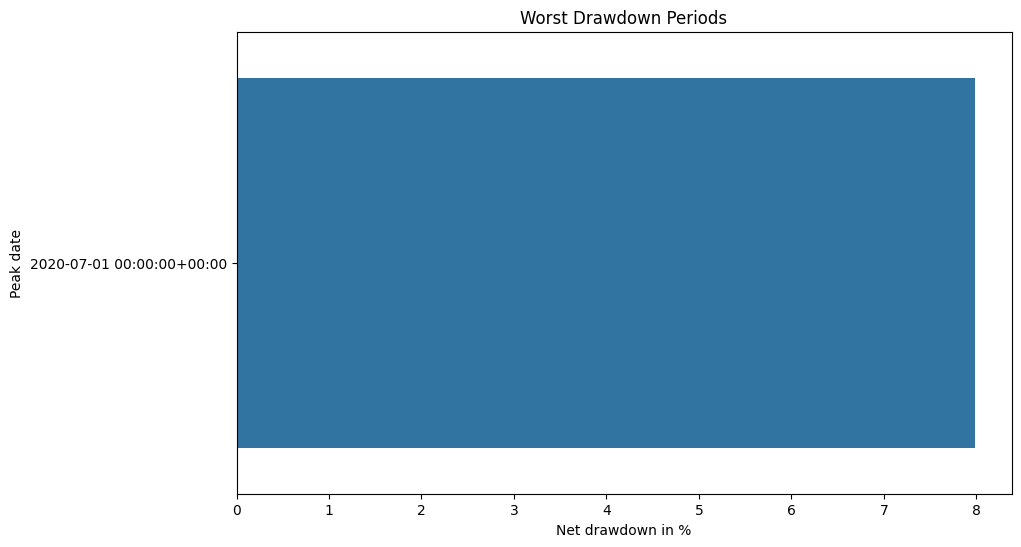

In [ ]:
trade = data_split(df,'2020-07-01', '2021-10-31')
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)

trade.shape

df_daily_return, df_actions = DRLAgent.DRL_prediction(model=trained_sac,
                        environment = e_trade_gym)

df_daily_return.head()

df_daily_return.to_csv('df_daily_return.csv')

df_actions.head()

df_actions.to_csv('df_actions.csv')

"""<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class
"""

from pyfolio import timeseries
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return)
perf_func = timeseries.perf_stats
perf_stats_all = perf_func( returns=DRL_strat,
                              factor_returns=DRL_strat,
                                positions=None, transactions=None, turnover_denom="AGB")

print("==============DRL Strategy Stats===========")
perf_stats_all

#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI",
        start = df_daily_return.loc[0,'date'],
        end = df_daily_return.loc[len(df_daily_return)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

"""<a id='6.2'></a>
## 7.2 BackTestPlot
"""

import pyfolio

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline

baseline_df = get_baseline(
        ticker='^DJI', start=df_daily_return.loc[0,'date'], end='2021-11-01'
    )
baseline_returns = get_daily_return(baseline_df, value_col_name="close")

import pyfolio as pf
import pandas as pd
import numpy as np
import empyrical
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your data is in the correct format
# Assuming DRL_strat and baseline_returns are your return series

# Convert index to datetime if it's not already
DRL_strat.index = pd.to_datetime(DRL_strat.index)
baseline_returns.index = pd.to_datetime(baseline_returns.index)

# Verify and convert if necessary
if not isinstance(DRL_strat.index, pd.DatetimeIndex):
    DRL_strat.index = pd.to_datetime(DRL_strat.index)

if not isinstance(baseline_returns.index, pd.DatetimeIndex):
    baseline_returns.index = pd.to_datetime(baseline_returns.index)

# Align both series to ensure they have the same dates
DRL_strat = DRL_strat.reindex(baseline_returns.index, method='ffill')
baseline_returns = baseline_returns.reindex(DRL_strat.index, method='ffill')

# Function to calculate drawdowns
def calculate_drawdowns(returns):
    cumulative_returns = empyrical.cum_returns(returns, starting_value=1.0)
    high_water_marks = cumulative_returns.cummax()
    drawdowns = cumulative_returns / high_water_marks - 1
    return drawdowns

# Function to create a drawdown table
def create_drawdown_table(returns, top=10):
    drawdowns = calculate_drawdowns(returns)
    drawdown_periods = []

    peak = 0
    valley = 0
    recovery = np.nan

    for t in range(1, len(drawdowns)):
        if drawdowns.iloc[t] < drawdowns.iloc[valley]:
            valley = t
        if drawdowns.iloc[t] > drawdowns.iloc[peak]:
            peak = t
            valley = t
        if np.isnan(recovery) and drawdowns.iloc[t] == 0:
            recovery = t
        if not np.isnan(recovery):
            drawdown_periods.append((peak, valley, recovery))
            recovery = np.nan  # Reset recovery to find the next one

    drawdown_df = pd.DataFrame(drawdown_periods, columns=['Peak', 'Valley', 'Recovery'])
    drawdown_df['Peak date'] = returns.index[drawdown_df['Peak']]
    drawdown_df['Valley date'] = returns.index[drawdown_df['Valley']]
    drawdown_df['Recovery date'] = returns.index[drawdown_df['Recovery']]
    drawdown_df['Net drawdown in %'] = [drawdowns.iloc[v] * -100 for v in drawdown_df['Valley']]
    drawdown_df = drawdown_df[['Peak date', 'Valley date', 'Recovery date', 'Net drawdown in %']]
    return drawdown_df.sort_values(by='Net drawdown in %', ascending=False).head(top)

# Function to print summary statistics
def print_summary_stats(returns, benchmark_rets):
    perf_stats = pf.timeseries.perf_stats(returns)
    benchmark_perf_stats = pf.timeseries.perf_stats(benchmark_rets)

    print("Start date:", returns.index[0])
    print("End date:", returns.index[-1])
    print("Total months:", len(returns) // 21)  # Approximation
    print("\nBacktest Performance")
    print(perf_stats)
    print("\nBenchmark Performance")
    print(benchmark_perf_stats)

    drawdown_table = create_drawdown_table(returns)
    print("\nWorst drawdown periods")
    print(drawdown_table)

# Define the plots to be generated
def plot_returns(returns, benchmark_rets):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_returns(returns, factor_returns=benchmark_rets, ax=ax)
    plt.show()

def plot_rolling_volatility(returns, benchmark_rets):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_volatility(returns, factor_returns=benchmark_rets, ax=ax)
    plt.show()

def plot_rolling_sharpe(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_sharpe(returns, ax=ax)
    plt.show()

def plot_drawdown_underwater(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_drawdown_underwater(returns, ax=ax)
    plt.show()

def plot_monthly_returns_heatmap(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_monthly_returns_heatmap(returns, ax=ax)
    plt.show()

def plot_annual_returns(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_annual_returns(returns, ax=ax)
    plt.show()

# Print summary statistics
print_summary_stats(DRL_strat, baseline_returns)

# Manually create the full tear sheet except the problematic plots
with pf.plotting.plotting_context(font_scale=1.1):
    plot_returns(DRL_strat, baseline_returns)
    plot_rolling_volatility(DRL_strat, baseline_returns)
    plot_rolling_sharpe(DRL_strat)
    plot_drawdown_underwater(DRL_strat)
    plot_monthly_returns_heatmap(DRL_strat)
    plot_annual_returns(DRL_strat)

# Manually create the drawdown plot
drawdown_table = create_drawdown_table(DRL_strat)

plt.figure(figsize=(10, 6))
sns.barplot(x='Net drawdown in %', y='Peak date', data=drawdown_table)
plt.title('Worst Drawdown Periods')
plt.xlabel('Net drawdown in %')
plt.ylabel('Peak date')
plt.show()

"""## Min-Variance Portfolio Allocation"""

# Commented out IPython magic to ensure Python compatibility.
# %pip install PyPortfolioOpt

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models

unique_tic = trade.tic.unique()
unique_trade_date = trade.date.unique()

df.head()

#calculate_portfolio_minimum_variance
portfolio = pd.DataFrame(index = range(1), columns = unique_trade_date)
initial_capital = 1000000
portfolio.loc[0,unique_trade_date[0]] = initial_capital

for i in range(len( unique_trade_date)-1):
    df_temp = df[df.date==unique_trade_date[i]].reset_index(drop=True)
    df_temp_next = df[df.date==unique_trade_date[i+1]].reset_index(drop=True)
    #Sigma = risk_models.sample_cov(df_temp.return_list[0])
    #calculate covariance matrix
    Sigma = df_temp.return_list[0].cov()
    #portfolio allocation
    ef_min_var = EfficientFrontier(None, Sigma,weight_bounds=(0, 0.1))
    #minimum variance
    raw_weights_min_var = ef_min_var.min_volatility()
    #get weights
    cleaned_weights_min_var = ef_min_var.clean_weights()

    #current capital
    cap = portfolio.iloc[0, i]
    #current cash invested for each stock
    current_cash = [element * cap for element in list(cleaned_weights_min_var.values())]
    # current held shares
    current_shares = list(np.array(current_cash)
                                      / np.array(df_temp.close))
    # next time period price
    next_price = np.array(df_temp_next.close)
    ##next_price * current share to calculate next total account value
    portfolio.iloc[0, i+1] = np.dot(current_shares, next_price)

portfolio=portfolio.T
portfolio.columns = ['account_value']

portfolio.head()

a2c_cumpod =(df_daily_return.daily_return+1).cumprod()-1

min_var_cumpod =(portfolio.account_value.pct_change()+1).cumprod()-1

dji_cumpod =(baseline_returns+1).cumprod()-1

"""## Plotly: DRL, Min-Variance, DJIA"""

# Commented out IPython magic to ensure Python compatibility.
# %pip install plotly

from datetime import datetime as dt

import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

time_ind = pd.Series(df_daily_return.date)

trace0_portfolio = go.Scatter(x = time_ind, y = a2c_cumpod, mode = 'lines', name = 'SAC (Portfolio Allocation)')

trace1_portfolio = go.Scatter(x = time_ind, y = dji_cumpod, mode = 'lines', name = 'DJIA')
trace2_portfolio = go.Scatter(x = time_ind, y = min_var_cumpod, mode = 'lines', name = 'Min-Variance')
#trace3_portfolio = go.Scatter(x = time_ind, y = ddpg_cumpod, mode = 'lines', name = 'DDPG')
#trace4_portfolio = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')
#trace5_portfolio = go.Scatter(x = time_ind, y = min_cumpod, mode = 'lines', name = 'Min-Variance')

#trace4 = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')

#trace2 = go.Scatter(x = time_ind, y = portfolio_cost_minv, mode = 'lines', name = 'Min-Variance')
#trace3 = go.Scatter(x = time_ind, y = spx_value, mode = 'lines', name = 'SPX')

fig = go.Figure()
fig.add_trace(trace0_portfolio)

fig.add_trace(trace1_portfolio)

fig.add_trace(trace2_portfolio)



fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=15,
            color="black"
        ),
        bgcolor="White",
        bordercolor="white",
        borderwidth=2

    ),
)
#fig.update_layout(legend_orientation="h")
fig.update_layout(title={
        #'text': "Cumulative Return using FinRL",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
#with Transaction cost
#fig.update_layout(title =  'Quarterly Trade Date')
fig.update_layout(
#    margin=dict(l=20, r=20, t=20, b=20),

    paper_bgcolor='rgba(1,1,0,0)',
    plot_bgcolor='rgba(1, 1, 0, 0)',
    #xaxis_title="Date",
    yaxis_title="Cumulative Return",
xaxis={'type': 'date',
       'tick0': time_ind[0],
        'tickmode': 'linear',
       'dtick': 86400000.0 *80}

)
fig.update_xaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='LightSteelBlue')

fig.show()



begin_total_asset:1000000
end_total_asset:1393499.3821688686
Sharpe:  1.6178241885773519
hit end!
==============DRL Strategy Stats===========
==============Get Baseline Stats===========


/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

[*********************100%%**********************]  1 of 1 completed


Shape of DataFrame:  (336, 8)
Annual return          0.279047
Cumulative returns     0.388402
Annual volatility      0.139129
Sharpe ratio           1.844560
Calmar ratio           3.124551
Stability              0.918675
Max drawdown          -0.089308
Omega ratio            1.358960
Sortino ratio          2.734872
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.052781
Daily value at risk   -0.016510
dtype: float64
Shape of DataFrame:  (337, 8)
Start date: 2020-07-01 00:00:00+00:00
End date: 2021-10-29 00:00:00+00:00
Total months: 16

Backtest Performance
Annual return          0.264463
Cumulative returns     0.368609
Annual volatility      0.166656
Sharpe ratio           1.491711
Calmar ratio           2.594549
Stability              0.783444
Max drawdown          -0.101930
Omega ratio            1.276720
Sortino ratio          2.260018
Skew                  -0.111406
Kurtosis               0.446096
Tail ratio             1.107682
Daily value 

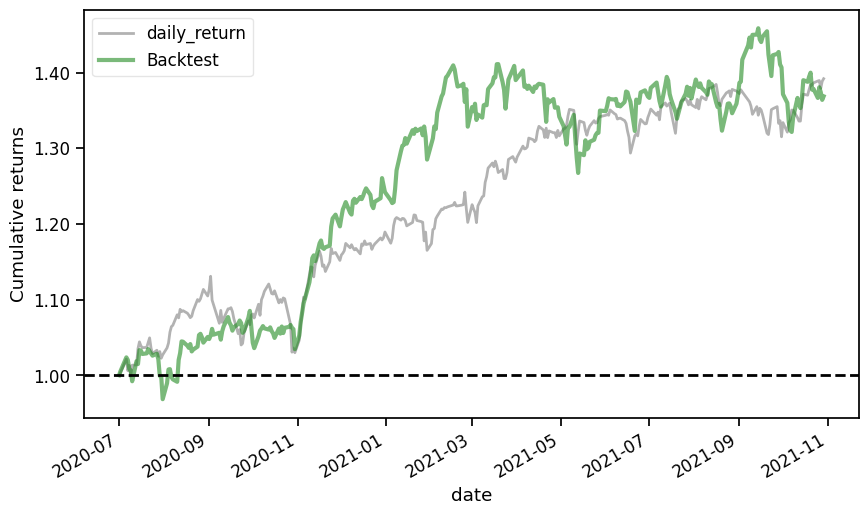

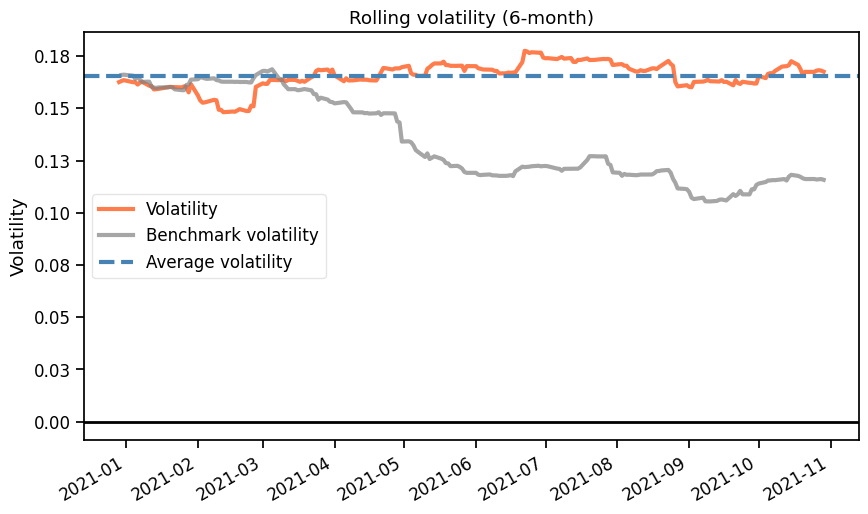

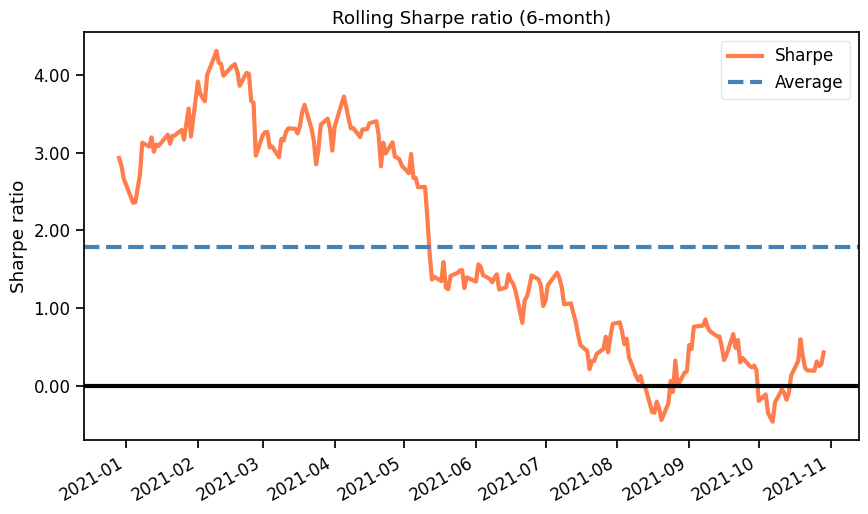

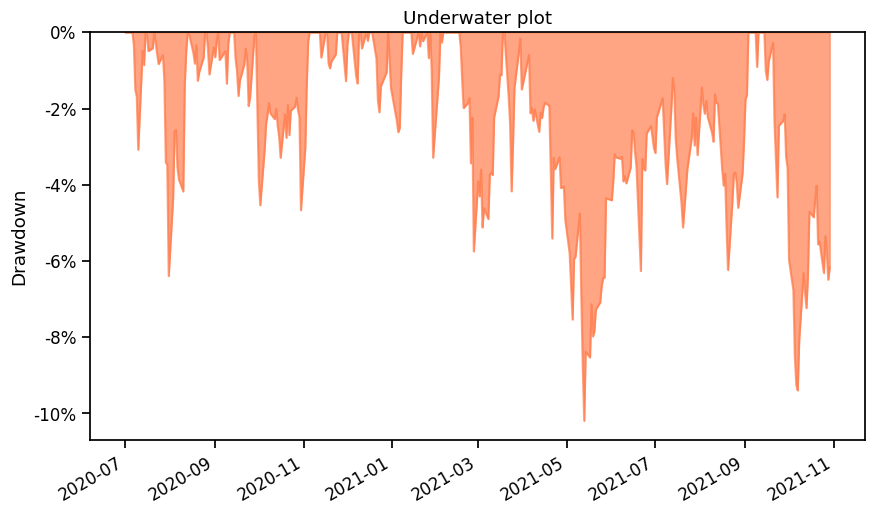

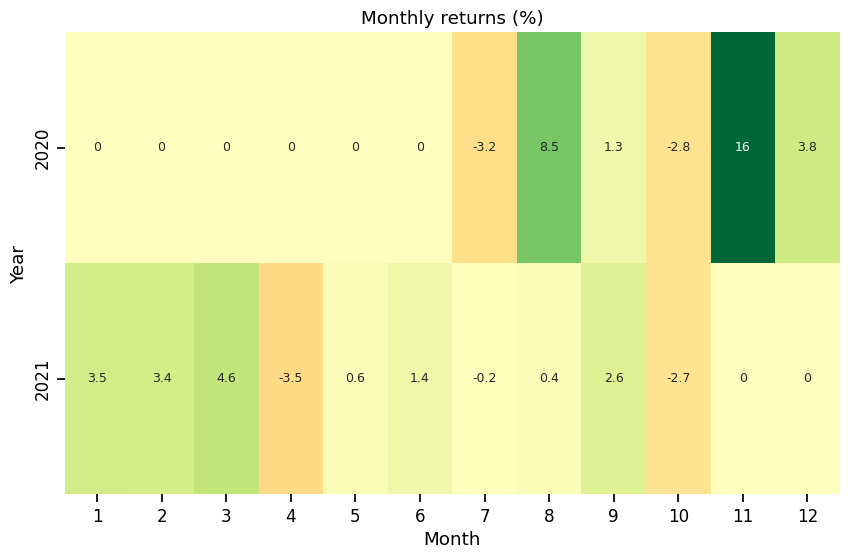

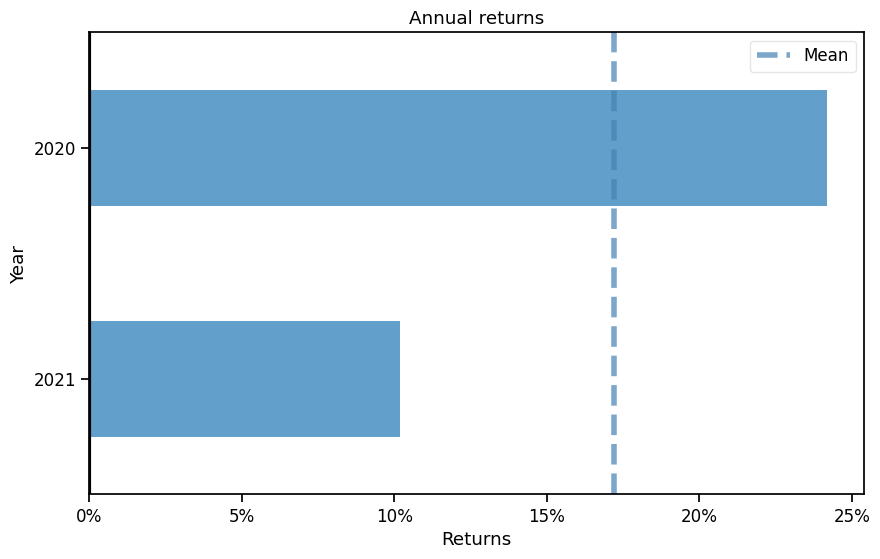

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)

/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



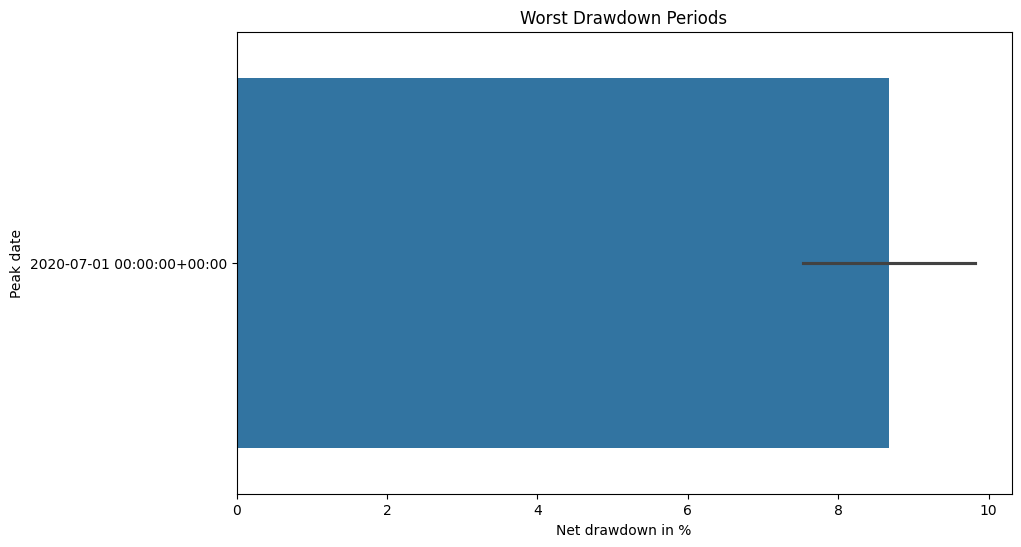

In [ ]:
trade = data_split(df,'2020-07-01', '2021-10-31')
e_trade_gym = StockPortfolioEnv(df = trade, **env_kwargs)

trade.shape

df_daily_return, df_actions = DRLAgent.DRL_prediction(model=trained_td3,
                        environment = e_trade_gym)

df_daily_return.head()

df_daily_return.to_csv('df_daily_return.csv')

df_actions.head()

df_actions.to_csv('df_actions.csv')

"""<a id='6'></a>
# Part 7: Backtest Our Strategy
Backtesting plays a key role in evaluating the performance of a trading strategy. Automated backtesting tool is preferred because it reduces the human error. We usually use the Quantopian pyfolio package to backtest our trading strategies. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

<a id='6.1'></a>
## 7.1 BackTestStats
pass in df_account_value, this information is stored in env class
"""

from pyfolio import timeseries
DRL_strat = convert_daily_return_to_pyfolio_ts(df_daily_return)
perf_func = timeseries.perf_stats
perf_stats_all = perf_func( returns=DRL_strat,
                              factor_returns=DRL_strat,
                                positions=None, transactions=None, turnover_denom="AGB")

print("==============DRL Strategy Stats===========")
perf_stats_all

#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI",
        start = df_daily_return.loc[0,'date'],
        end = df_daily_return.loc[len(df_daily_return)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

"""<a id='6.2'></a>
## 7.2 BackTestPlot
"""

import pyfolio

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline

baseline_df = get_baseline(
        ticker='^DJI', start=df_daily_return.loc[0,'date'], end='2021-11-01'
    )
baseline_returns = get_daily_return(baseline_df, value_col_name="close")

import pyfolio as pf
import pandas as pd
import numpy as np
import empyrical
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure your data is in the correct format
# Assuming DRL_strat and baseline_returns are your return series

# Convert index to datetime if it's not already
DRL_strat.index = pd.to_datetime(DRL_strat.index)
baseline_returns.index = pd.to_datetime(baseline_returns.index)

# Verify and convert if necessary
if not isinstance(DRL_strat.index, pd.DatetimeIndex):
    DRL_strat.index = pd.to_datetime(DRL_strat.index)

if not isinstance(baseline_returns.index, pd.DatetimeIndex):
    baseline_returns.index = pd.to_datetime(baseline_returns.index)

# Align both series to ensure they have the same dates
DRL_strat = DRL_strat.reindex(baseline_returns.index, method='ffill')
baseline_returns = baseline_returns.reindex(DRL_strat.index, method='ffill')

# Function to calculate drawdowns
def calculate_drawdowns(returns):
    cumulative_returns = empyrical.cum_returns(returns, starting_value=1.0)
    high_water_marks = cumulative_returns.cummax()
    drawdowns = cumulative_returns / high_water_marks - 1
    return drawdowns

# Function to create a drawdown table
def create_drawdown_table(returns, top=10):
    drawdowns = calculate_drawdowns(returns)
    drawdown_periods = []

    peak = 0
    valley = 0
    recovery = np.nan

    for t in range(1, len(drawdowns)):
        if drawdowns.iloc[t] < drawdowns.iloc[valley]:
            valley = t
        if drawdowns.iloc[t] > drawdowns.iloc[peak]:
            peak = t
            valley = t
        if np.isnan(recovery) and drawdowns.iloc[t] == 0:
            recovery = t
        if not np.isnan(recovery):
            drawdown_periods.append((peak, valley, recovery))
            recovery = np.nan  # Reset recovery to find the next one

    drawdown_df = pd.DataFrame(drawdown_periods, columns=['Peak', 'Valley', 'Recovery'])
    drawdown_df['Peak date'] = returns.index[drawdown_df['Peak']]
    drawdown_df['Valley date'] = returns.index[drawdown_df['Valley']]
    drawdown_df['Recovery date'] = returns.index[drawdown_df['Recovery']]
    drawdown_df['Net drawdown in %'] = [drawdowns.iloc[v] * -100 for v in drawdown_df['Valley']]
    drawdown_df = drawdown_df[['Peak date', 'Valley date', 'Recovery date', 'Net drawdown in %']]
    return drawdown_df.sort_values(by='Net drawdown in %', ascending=False).head(top)

# Function to print summary statistics
def print_summary_stats(returns, benchmark_rets):
    perf_stats = pf.timeseries.perf_stats(returns)
    benchmark_perf_stats = pf.timeseries.perf_stats(benchmark_rets)

    print("Start date:", returns.index[0])
    print("End date:", returns.index[-1])
    print("Total months:", len(returns) // 21)  # Approximation
    print("\nBacktest Performance")
    print(perf_stats)
    print("\nBenchmark Performance")
    print(benchmark_perf_stats)

    drawdown_table = create_drawdown_table(returns)
    print("\nWorst drawdown periods")
    print(drawdown_table)

# Define the plots to be generated
def plot_returns(returns, benchmark_rets):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_returns(returns, factor_returns=benchmark_rets, ax=ax)
    plt.show()

def plot_rolling_volatility(returns, benchmark_rets):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_volatility(returns, factor_returns=benchmark_rets, ax=ax)
    plt.show()

def plot_rolling_sharpe(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_rolling_sharpe(returns, ax=ax)
    plt.show()

def plot_drawdown_underwater(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_drawdown_underwater(returns, ax=ax)
    plt.show()

def plot_monthly_returns_heatmap(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_monthly_returns_heatmap(returns, ax=ax)
    plt.show()

def plot_annual_returns(returns):
    fig, ax = plt.subplots(figsize=(10, 6))
    pf.plotting.plot_annual_returns(returns, ax=ax)
    plt.show()

# Print summary statistics
print_summary_stats(DRL_strat, baseline_returns)

# Manually create the full tear sheet except the problematic plots
with pf.plotting.plotting_context(font_scale=1.1):
    plot_returns(DRL_strat, baseline_returns)
    plot_rolling_volatility(DRL_strat, baseline_returns)
    plot_rolling_sharpe(DRL_strat)
    plot_drawdown_underwater(DRL_strat)
    plot_monthly_returns_heatmap(DRL_strat)
    plot_annual_returns(DRL_strat)

# Manually create the drawdown plot
drawdown_table = create_drawdown_table(DRL_strat)

plt.figure(figsize=(10, 6))
sns.barplot(x='Net drawdown in %', y='Peak date', data=drawdown_table)
plt.title('Worst Drawdown Periods')
plt.xlabel('Net drawdown in %')
plt.ylabel('Peak date')
plt.show()



"""## Min-Variance Portfolio Allocation"""

# Commented out IPython magic to ensure Python compatibility.
# %pip install PyPortfolioOpt

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models

unique_tic = trade.tic.unique()
unique_trade_date = trade.date.unique()

df.head()

#calculate_portfolio_minimum_variance
portfolio = pd.DataFrame(index = range(1), columns = unique_trade_date)
initial_capital = 1000000
portfolio.loc[0,unique_trade_date[0]] = initial_capital

for i in range(len( unique_trade_date)-1):
    df_temp = df[df.date==unique_trade_date[i]].reset_index(drop=True)
    df_temp_next = df[df.date==unique_trade_date[i+1]].reset_index(drop=True)
    #Sigma = risk_models.sample_cov(df_temp.return_list[0])
    #calculate covariance matrix
    Sigma = df_temp.return_list[0].cov()
    #portfolio allocation
    ef_min_var = EfficientFrontier(None, Sigma,weight_bounds=(0, 0.1))
    #minimum variance
    raw_weights_min_var = ef_min_var.min_volatility()
    #get weights
    cleaned_weights_min_var = ef_min_var.clean_weights()

    #current capital
    cap = portfolio.iloc[0, i]
    #current cash invested for each stock
    current_cash = [element * cap for element in list(cleaned_weights_min_var.values())]
    # current held shares
    current_shares = list(np.array(current_cash)
                                      / np.array(df_temp.close))
    # next time period price
    next_price = np.array(df_temp_next.close)
    ##next_price * current share to calculate next total account value
    portfolio.iloc[0, i+1] = np.dot(current_shares, next_price)

portfolio=portfolio.T
portfolio.columns = ['account_value']

portfolio.head()

a2c_cumpod =(df_daily_return.daily_return+1).cumprod()-1

min_var_cumpod =(portfolio.account_value.pct_change()+1).cumprod()-1

dji_cumpod =(baseline_returns+1).cumprod()-1

"""## Plotly: DRL, Min-Variance, DJIA"""

# Commented out IPython magic to ensure Python compatibility.
# %pip install plotly

from datetime import datetime as dt

import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

time_ind = pd.Series(df_daily_return.date)

trace0_portfolio = go.Scatter(x = time_ind, y = a2c_cumpod, mode = 'lines', name = 'TD3 (Portfolio Allocation)')

trace1_portfolio = go.Scatter(x = time_ind, y = dji_cumpod, mode = 'lines', name = 'DJIA')
trace2_portfolio = go.Scatter(x = time_ind, y = min_var_cumpod, mode = 'lines', name = 'Min-Variance')
#trace3_portfolio = go.Scatter(x = time_ind, y = ddpg_cumpod, mode = 'lines', name = 'DDPG')
#trace4_portfolio = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')
#trace5_portfolio = go.Scatter(x = time_ind, y = min_cumpod, mode = 'lines', name = 'Min-Variance')

#trace4 = go.Scatter(x = time_ind, y = addpg_cumpod, mode = 'lines', name = 'Adaptive-DDPG')

#trace2 = go.Scatter(x = time_ind, y = portfolio_cost_minv, mode = 'lines', name = 'Min-Variance')
#trace3 = go.Scatter(x = time_ind, y = spx_value, mode = 'lines', name = 'SPX')

fig = go.Figure()
fig.add_trace(trace0_portfolio)

fig.add_trace(trace1_portfolio)

fig.add_trace(trace2_portfolio)



fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=15,
            color="black"
        ),
        bgcolor="White",
        bordercolor="white",
        borderwidth=2

    ),
)
#fig.update_layout(legend_orientation="h")
fig.update_layout(title={
        #'text': "Cumulative Return using FinRL",
        'y':0.85,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
#with Transaction cost
#fig.update_layout(title =  'Quarterly Trade Date')
fig.update_layout(
#    margin=dict(l=20, r=20, t=20, b=20),

    paper_bgcolor='rgba(1,1,0,0)',
    plot_bgcolor='rgba(1, 1, 0, 0)',
    #xaxis_title="Date",
    yaxis_title="Cumulative Return",
xaxis={'type': 'date',
       'tick0': time_ind[0],
        'tickmode': 'linear',
       'dtick': 86400000.0 *80}

)
fig.update_xaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(showline=True,linecolor='black',showgrid=True, gridwidth=1, gridcolor='LightSteelBlue',mirror=True)
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='LightSteelBlue')

fig.show()

